# Cuarta lista - Problema grupal 4

## Componentes del grupo

* Pol Casacuberta Gil
* Joaquin Faraone Prieto
* Agnès Felip i Díaz
* Marta Granero I Martí


## Predecirme a mí mismo

### Una de las cosas interesantes de las redes neuronales es que se pueden usar fácilmente para muchas tareas además de la clasificación y la regresión clásicas, dado que pueden representar cualquier tipo de función. Una posibilidad es implementar la función de identidad, básicamente una red que es capaz de predecir su entrada.

### Obviamente, la idea no es solo copiar la entrada, sino aprender una representación que pueda usarse para otros fines. Este tipo de red se llama *auto-codficador (autoencoder)*. La arquitectura de dicha red crea un cuello de botella en las capas ocultas, reduciendo el número de neuronas en cada capa hasta alcanzar un mínimo que corresponde a la dimensionalidad del espacio de representación de destino y luego va haciendo crecer el tamaño de las capas en orden inverso hasta tener una capa de salida que tiene la dimensionalidad de la entrada.

### El objetivo de este problema es implementar un auto-codificador y probarlo con el conjunto de datos $\texttt{dígits}$ que forma parte de los conjuntos de datos de scikit-learn ($\texttt{load_digits}$). Estos son dígitos escritos a mano transformados en imágenes de tamaño 8×8 representados como vectores de 64 elementos con valores en el rango [0,15] (escala de grises).

### El siguiente código implementa un auto-codificador usando keras/tensorflow:

``` python
act = 'linear'
entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(d1, activation=act)(entrada)
codificar = keras.layers.Dense(d2, activation=actuar)(codificar)
decodificar = keras.layers.Dense(d1, activation=actuar)(codificar)
decodificar = keras.layers.Dense(64, activation=actuar)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador = keras.Model(entrada, codificar)
```

### La red tiene capas de entrada y salida de tamaño 64 (el tamaño de los dígitos de ejemplo) y tres capas ocultas densas (MLP), dos capas gemelas con un tamaño más pequeño que la entrada y una capa intermedia con un tamaño de la dimensionalidad del espacio de codificación. Por ejemplo (16,2,16) será una red que primero reduce la dimensionalidad a un 25 % de la entrada, obtiene un espacio bidimensional y luego aumenta la dimensionalidad hasta volver a la dimensionalidad de los datos.
### Para entrenar la red solo tenéis que definir el optimizador y la funcion de pérdida y luego ajustar los datos de la siguiente manera:

```python
autocodificador.compile(optimizer=keras.optimizers.Adam(),
                        loss=keras.losses.MeanSquaredError())
autocodificador.fit(X_train, X_train,batch_size=BATCH_SIZE,
                             epochs=EPOCHS, verbose=False)
```

### La pérdida será el error al cuadrático, el optimizador adam. Podéis ver que al ajustar el auto-codificador, la entrada y la salida son los mismos datos. El tamaño de $\texttt{BATCH}$ y el número de $\texttt{EPOCHS}$ son hiperparámetros. Una vez entrenamos el $\texttt{autocodificador}$, la red $\texttt{codificador}$ (que es solo la primera parte del auto-codificador) se puede usar para transformar los datos al espacio de menor dimensionalidad.

### Procedemos a realizar los ejercicios que se nos piden




### Incluimos las librerias necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
import copy
import random

import tensorflow as tf
from tensorflow import keras

from statistics import mean

from scipy import stats
from scipy.stats import normaltest, anderson

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import  ConfusionMatrixDisplay,classification_report,\
                             RocCurveDisplay, PrecisionRecallDisplay,\
                             accuracy_score, f1_score, precision_score, recall_score

from sklearn.model_selection import train_test_split,  KFold, cross_val_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Binarizer
from sklearn.decomposition import PCA

from sklearn.datasets import load_digits

### Cargamos el conjunto de datos des de la librería de sklearn

En este caso, nuestro conjunto de datos es el famoso conjunto de los dígitos escritos a mano llamado MNIST.

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
digits_data = load_digits(as_frame=True)

X = digits_data.data
y = digits_data.target

X = pd.DataFrame(X)
y = pd.DataFrame(y)

print(X.shape, y.shape)
print(X.columns, y.columns)

(1797, 64) (1797, 1)
Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtype='object') Index(['target'], dtype='object')

### Breve información del dataset

Vemos que el conjunto de datos tiene 64 columnas, lo cuál nos indica que cada imagen esta compuesta por 64 píxeles, i.e 8x8 por imagen. Cada dígito viene etiquetado correctamente con un número del 0-9 que lo identifica.

In [ ]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

(None, None)

#### Extraemos las etiquetas de las clase a las que vamos a clasificar los ejemplos

In [ ]:
clases = [str(v) for v in sorted(np.unique(y))]
clases

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#### Vemos cúantos ejemplos tenemos de cada clase en nuestro conjunto de datos

In [ ]:
exemples = dict(zip(list(y),[y.value_counts()]))
exemples

{'target': target
 3         183
 1         182
 5         182
 4         181
 6         181
 9         180
 7         179
 0         178
 2         177
 8         174
 dtype: int64}

### Dividimos el conjunto de datos en entrenamiento y test

In [ ]:
#hemos de asegurarnos que los ejemplos estan correctamente etiquetados tq los índices de ambos (X,y) corresponden -> inner merge
digits_data_merge = pd.merge(X, y, left_index=True, right_index=True)
X = digits_data_merge.loc[:,digits_data_merge.columns != 'target']
y = digits_data_merge['target']

#digits_data_merge.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Breve estadística descriptiva sobre el conjunto de datos

Vemos las columnas son los píxeles (8x8 píxeles=64)

In [ ]:
X.describe(include='all')

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
y.describe(include='all')

,target
count,1797.000000
mean,4.490818
std,2.865304
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


##### Vemos que tanto el conjunto de datos de entrenamiento como el conjunto de test tienen 64 columnas, lo cuál nos indica que cada imagen esta compuesta por 64 píxeles, i.e 8x8 por imagen.

In [ ]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 513 to 1126
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1257 non-null   float64
 1   pixel_0_1  1257 non-null   float64
 2   pixel_0_2  1257 non-null   float64
 3   pixel_0_3  1257 non-null   float64
 4   pixel_0_4  1257 non-null   float64
 5   pixel_0_5  1257 non-null   float64
 6   pixel_0_6  1257 non-null   float64
 7   pixel_0_7  1257 non-null   float64
 8   pixel_1_0  1257 non-null   float64
 9   pixel_1_1  1257 non-null   float64
 10  pixel_1_2  1257 non-null   float64
 11  pixel_1_3  1257 non-null   float64
 12  pixel_1_4  1257 non-null   float64
 13  pixel_1_5  1257 non-null   float64
 14  pixel_1_6  1257 non-null   float64
 15  pixel_1_7  1257 non-null   float64
 16  pixel_2_0  1257 non-null   float64
 17  pixel_2_1  1257 non-null   float64
 18  pixel_2_2  1257 non-null   float64
 19  pixel_2_3  1257 non-null   float64
 20  pixel_

(None, None)

A continuación visualizaremos el conjunto de datos de entrenamiento, usando histogramas para mostrar la distribución de los píxeles. Esta visualización nos va a permitir extraer información sobre la possible gaussianidad de los píxeles que componen los dígitos. Lo vemos a continuación:

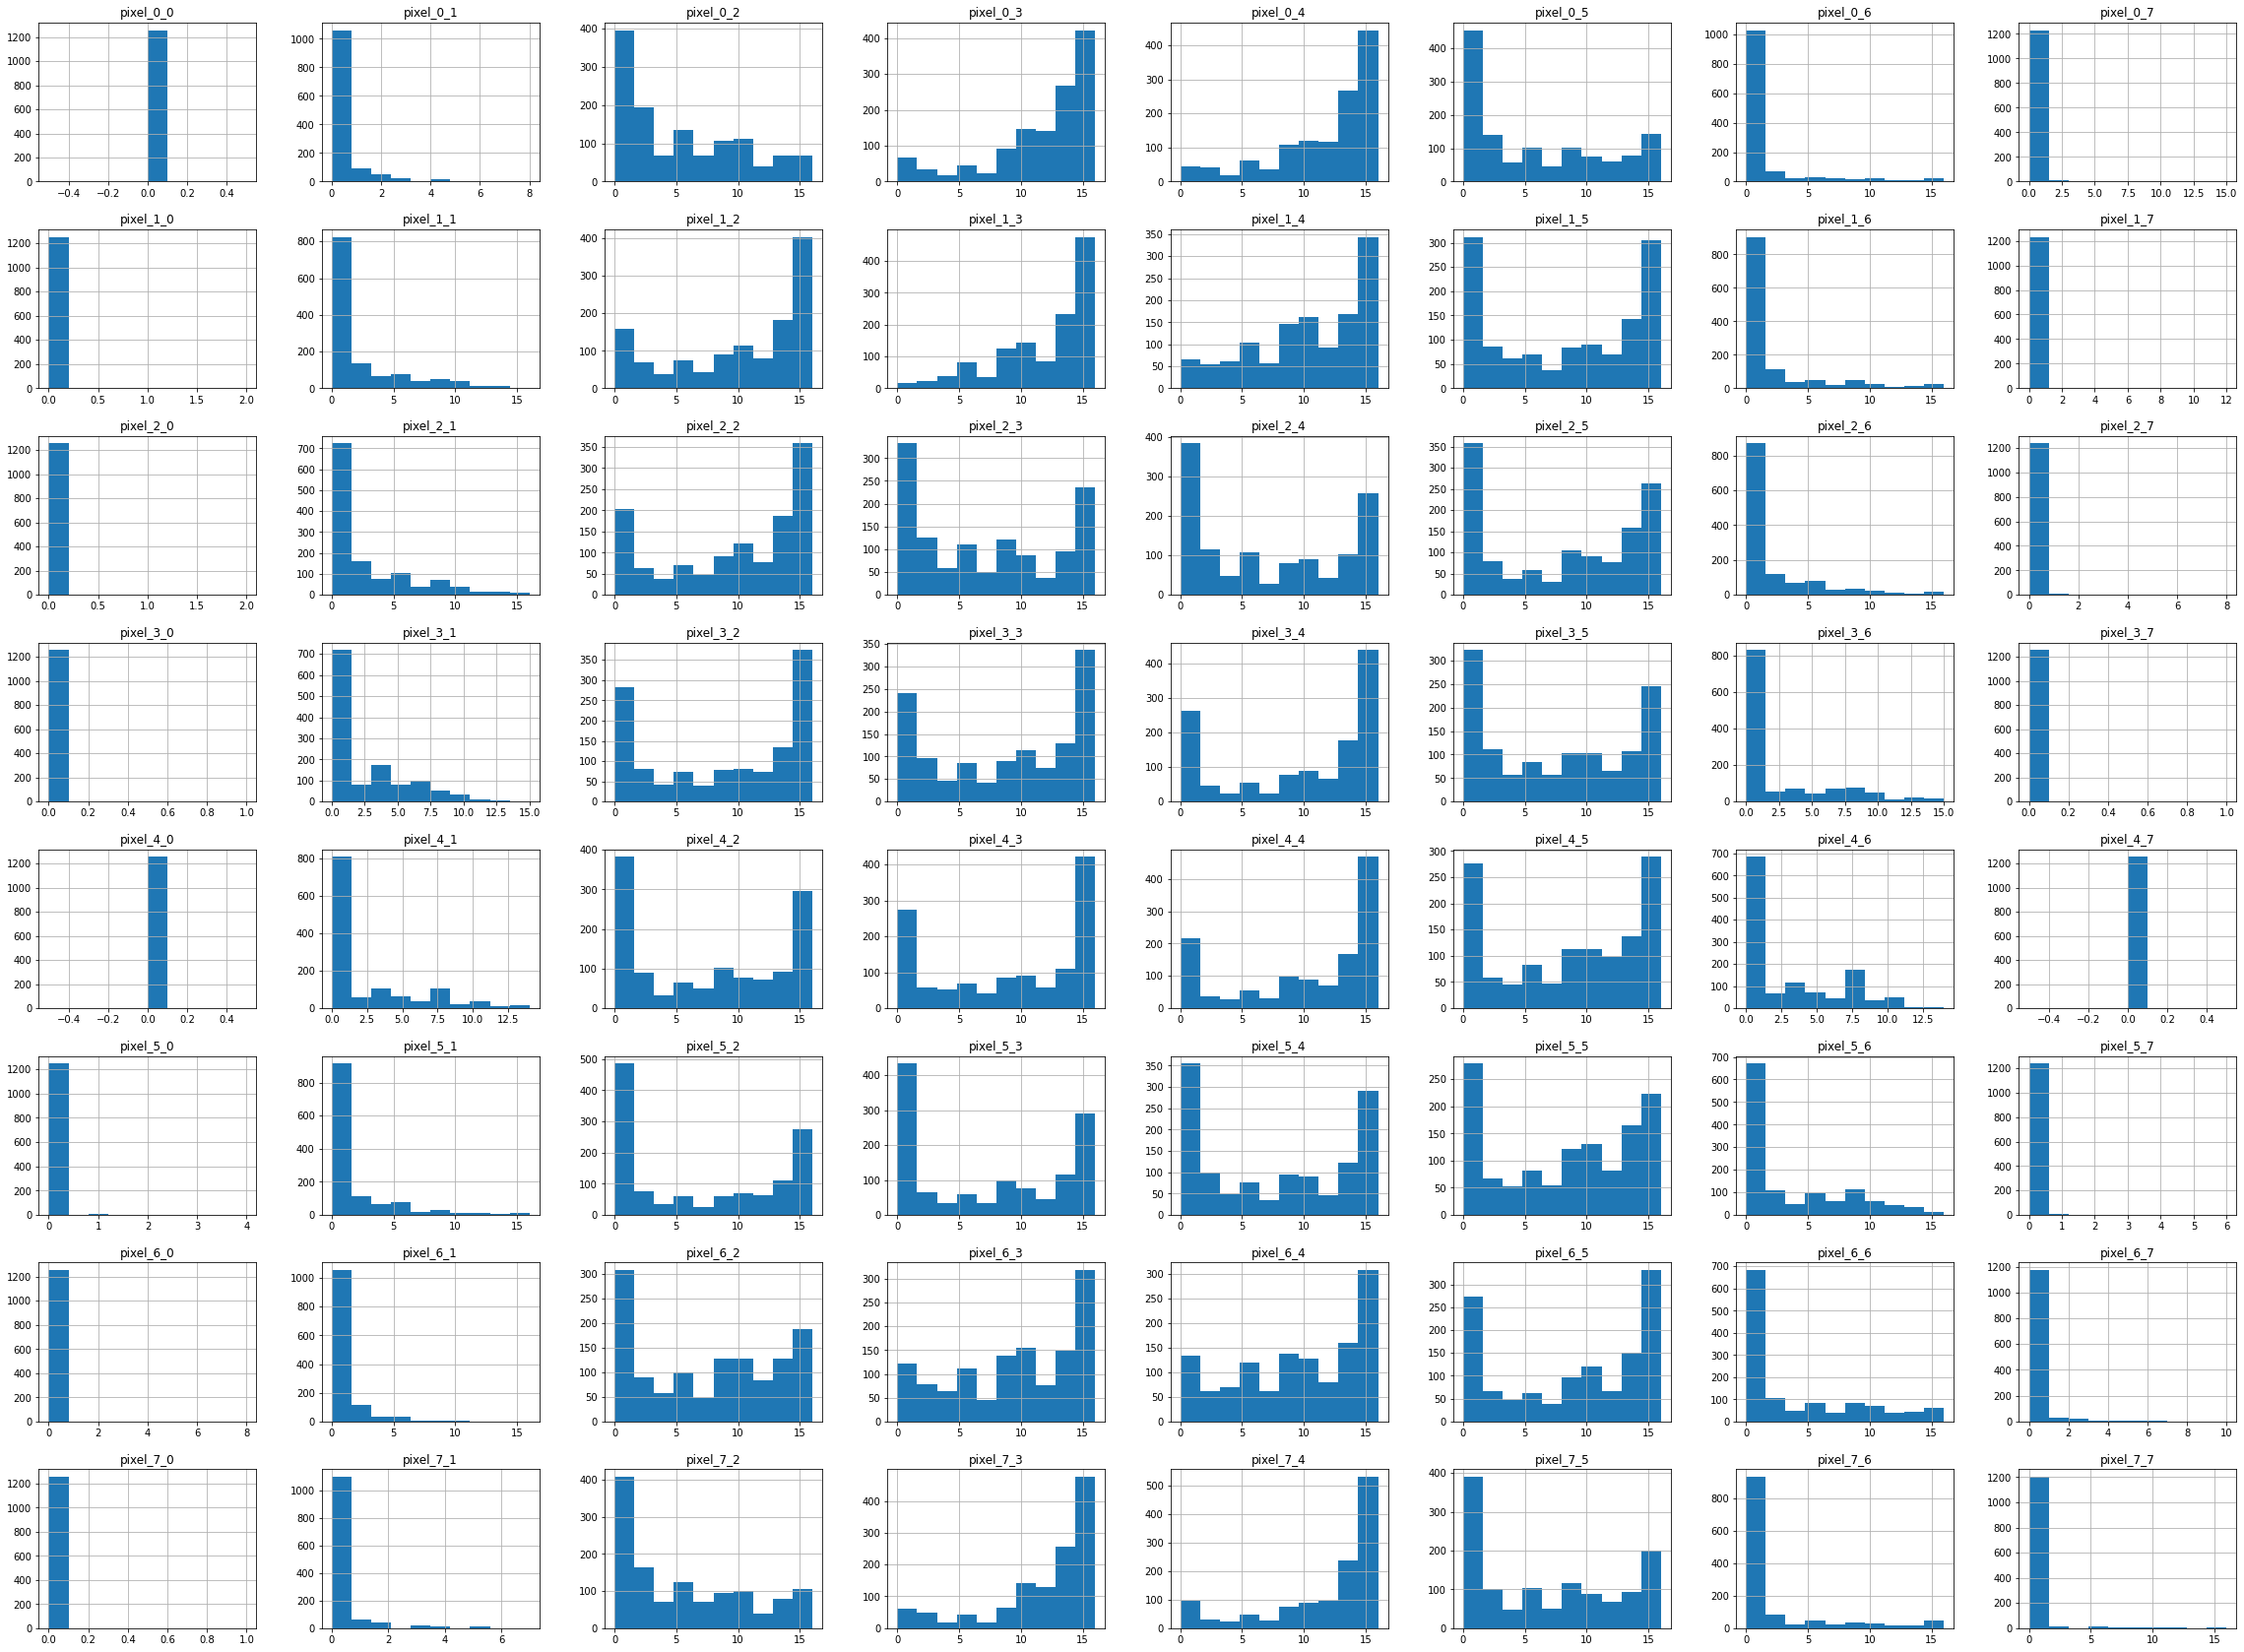

In [ ]:
X_train.hist(figsize=(40,30));

Parece ser que a simple vista ningún píxel sigue una distribución gausiana. Aún así, podemos comprobarlo tambien mediante el normaltest o anderson de la librería de **scipy**:

In [ ]:
X.columns

for column in X.columns:
    print("Columna", column, "test normal:", normaltest(X[column], nan_policy='omit'))
    if (column == "pixel_0_0" or column == "pixel_6_1"):
        print("Columna", column, "test normal:", anderson(X[column], dist="norm"))

Columna pixel_0_0 test normal: NormaltestResult(statistic=4680.350856584821, pvalue=0.0)
Columna pixel_0_0 test normal: AndersonResult(statistic=nan, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Columna pixel_0_1 test normal: NormaltestResult(statistic=1512.3043340661116, pvalue=0.0)
Columna pixel_0_2 test normal: NormaltestResult(statistic=248.99215698204006, pvalue=8.551456537067895e-55)
Columna pixel_0_3 test normal: NormaltestResult(statistic=322.8117587380826, pvalue=7.985778191091182e-71)
Columna pixel_0_4 test normal: NormaltestResult(statistic=269.6784033476552, pvalue=2.754728288345334e-59)
Columna pixel_0_5 test normal: NormaltestResult(statistic=1231.9752177053724, pvalue=3.0198165053352066e-268)
Columna pixel_0_6 test normal: NormaltestResult(statistic=1055.068195086668, pvalue=7.849688467173289e-230)
Columna pixel_0_7 test normal: NormaltestResult(statistic=2807.9100857492062, pvalue=0.0)
Columna pixe

#### Asimismo podemos ver la normalidad de los píxeles usando los boxplots

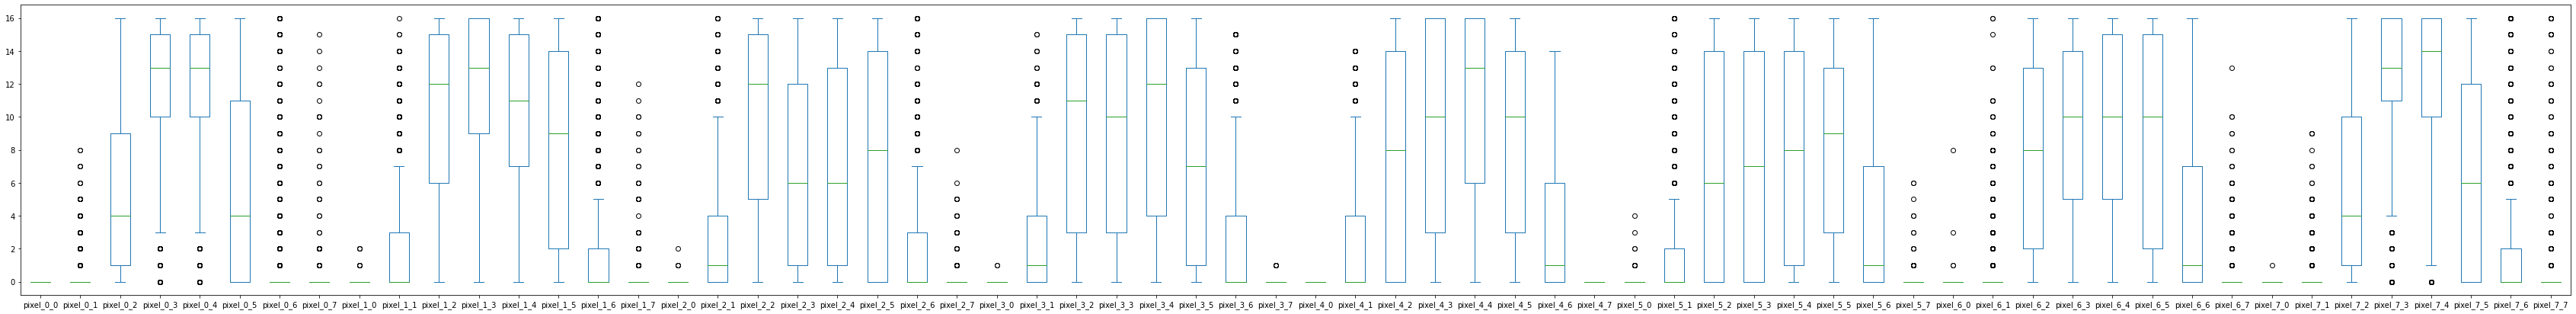

In [ ]:
X.plot.box(figsize=(60,7));

#### Correlación entre distintas variables predictivas

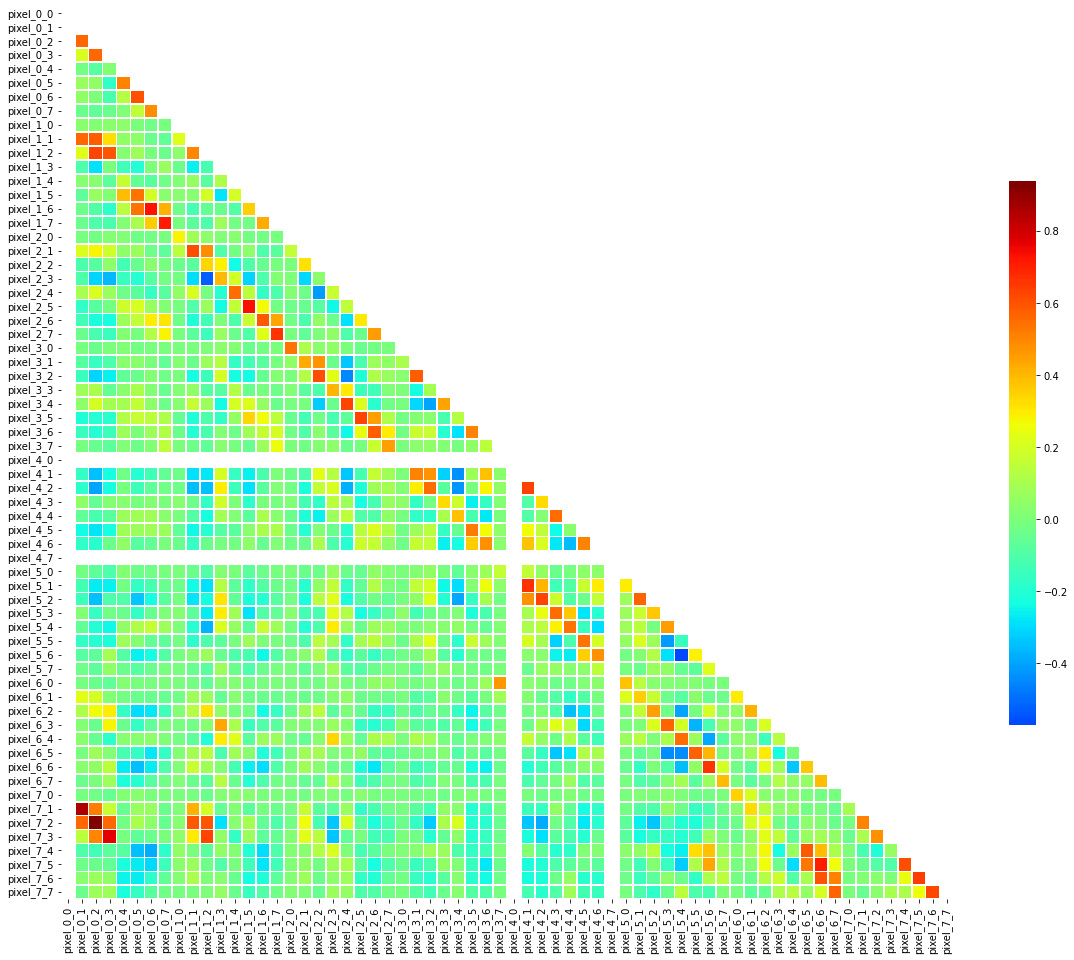

In [ ]:
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='jet',  center=0, square=True, linewidths=.8, cbar_kws={"shrink": .5});

Podemos ver que sí que existen correlaciones entre ciertos píxeles, ya que aparecen fuertes correlaciones como se puede ver en el heatmap. Pero también se puede apreciar que no existen correlaciones entre la gran mayoria de estos.

#### Correlación entre distintas variables predictivas y la variable objetivo

A continuación, podemos visualizar la relación que hay entre las diferentes variables predictivas y la variable objetivo de nuestro dataset calculando la correlación que existe entre estas.

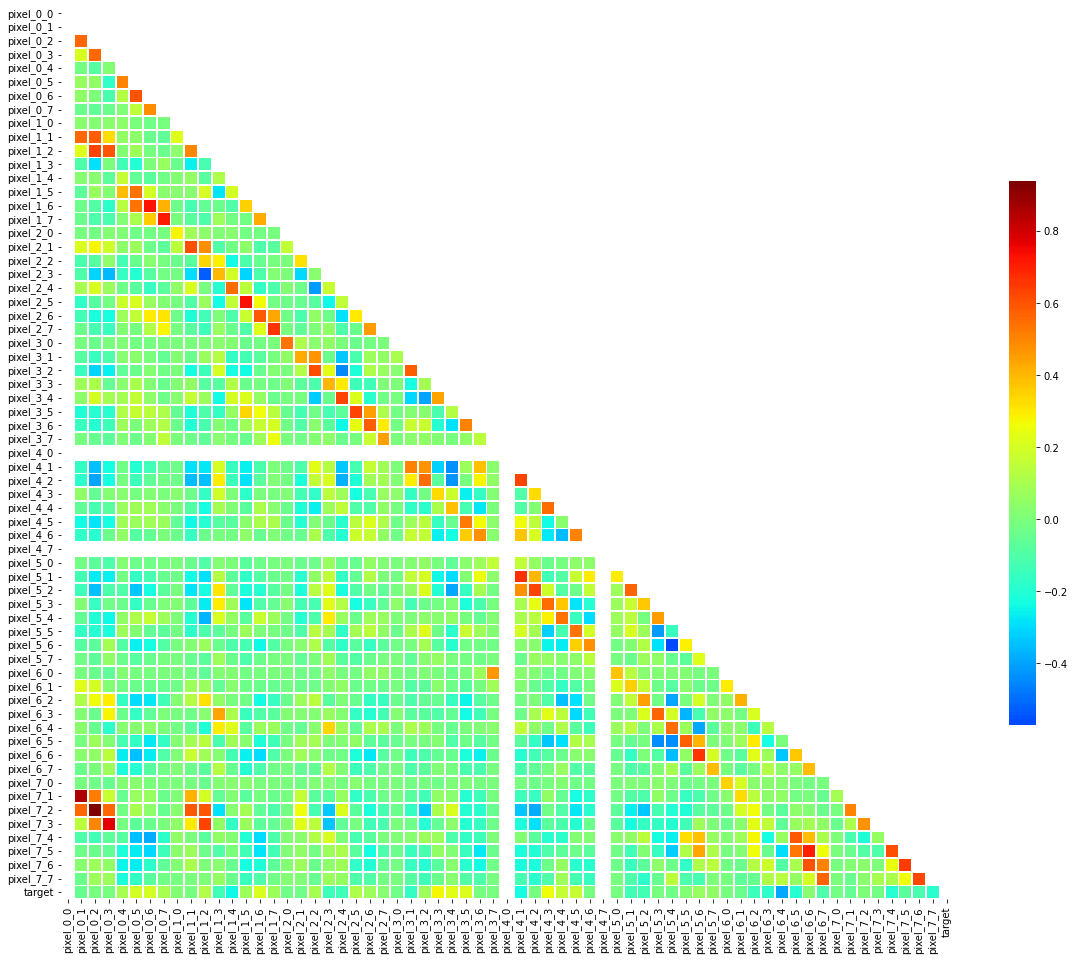

In [ ]:
corr = digits_data_merge.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='jet',  center=0, square=True, linewidths=.8, cbar_kws={"shrink": .5});

Podemos notar con el heatmap anterior que si que parece que algun otro píxel influye más a la hora de tomar la decision sobre qual es la etiqueta del dígito que se esconde detrás de cada imagen

#### Vemos cúantos ejemplos tenemos de cada clase en nuestro conjunto de entrenamiento

In [ ]:
exemples = dict(zip(list(y_train),[list(y_train).count(i) for i in list(y_train)]))
exemples

{8: 131,
 7: 124,
 1: 132,
 4: 121,
 6: 128,
 2: 130,
 5: 116,
 9: 121,
 0: 125,
 3: 129}

#### Extraemos las etiquetas de las clases a las que vamos a clasificar los ejemplos

In [ ]:
clases = [str(v) for v in sorted(np.unique(y_train))]
clases

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#### Visualización del conjunto de datos

##### Visualizamos algunas imágenes de los dígitos que se esconden detrás del conjunto de datos

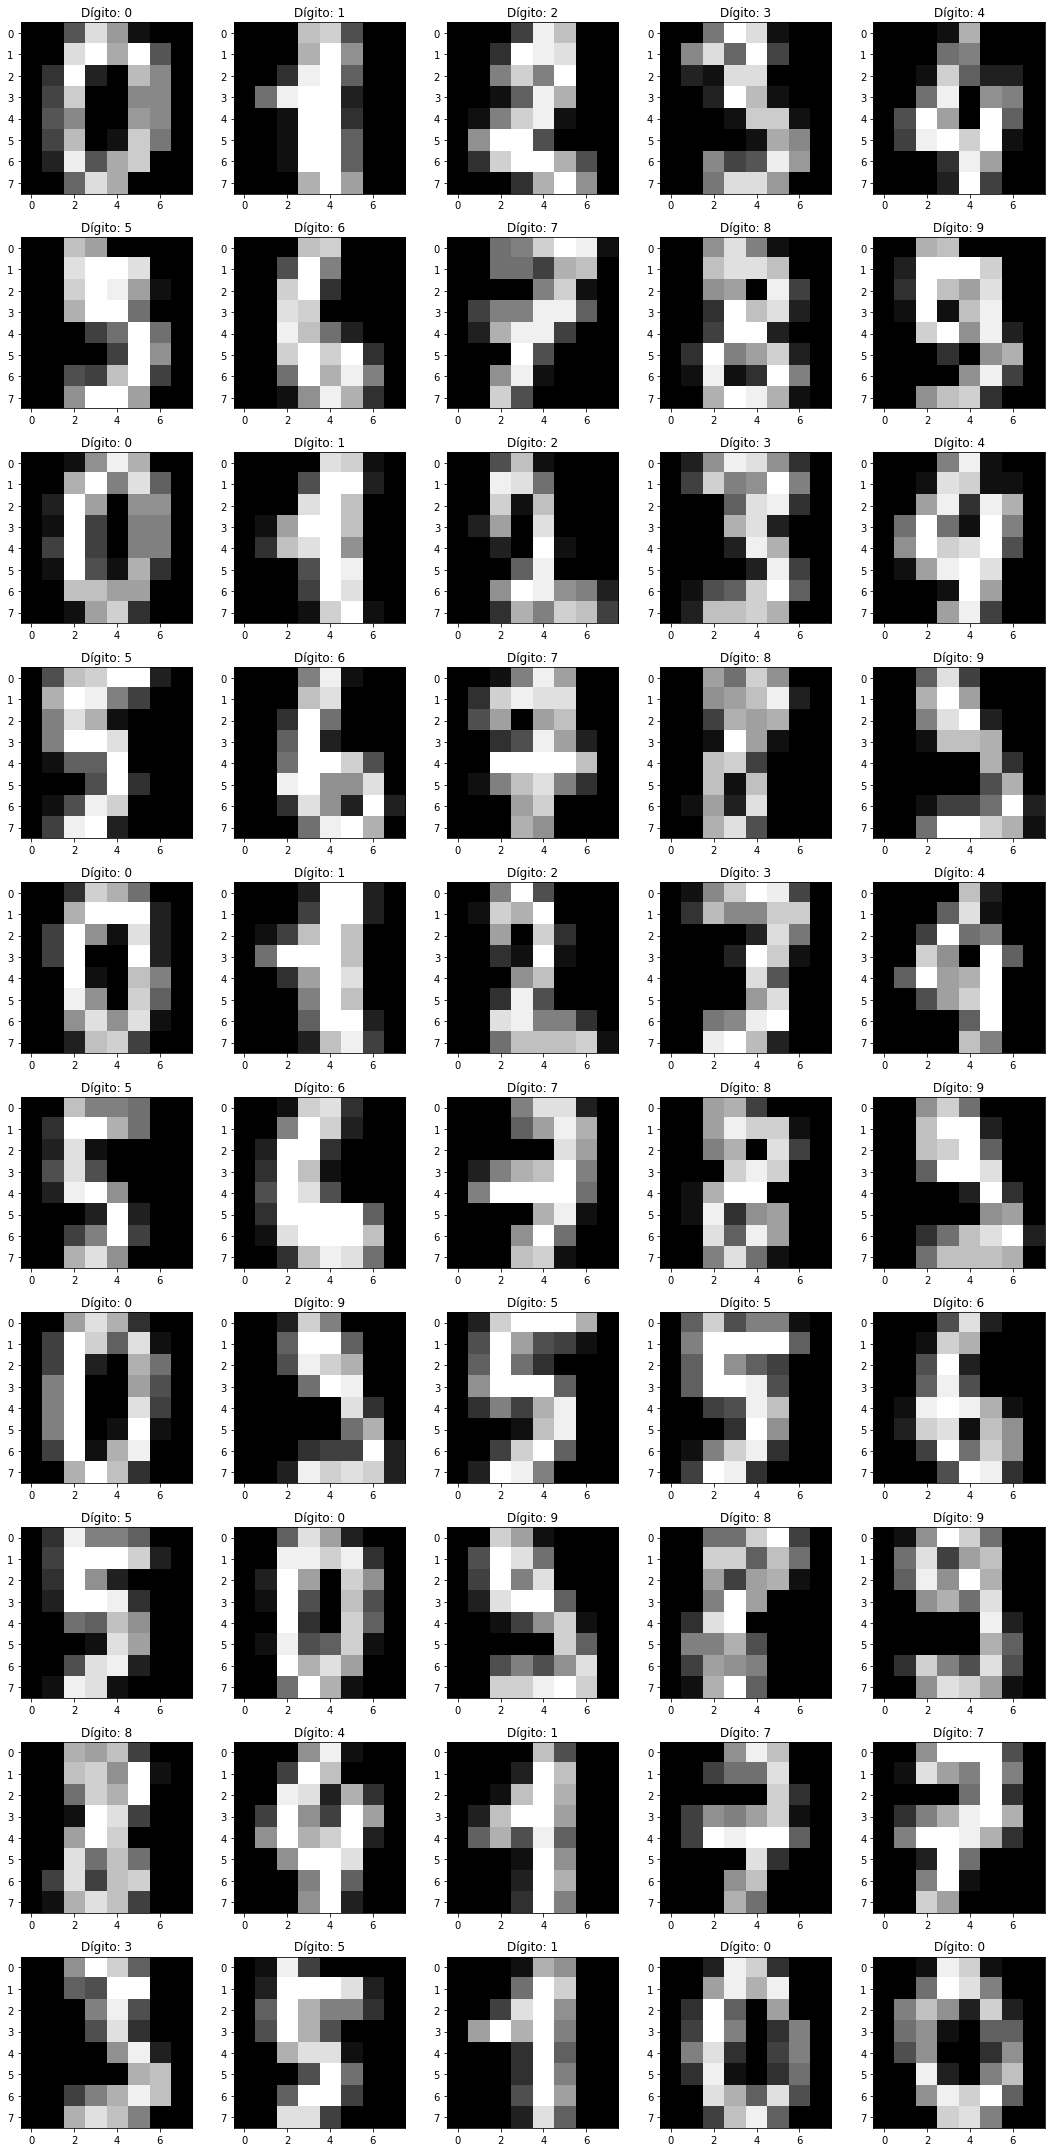

In [ ]:
digits_visualize = load_digits()

num = 50
num_row = 10
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(digits_visualize.images[i], cmap='gray')
    ax.set_title('Dígito: {}'.format(digits_visualize.target[i]))
plt.tight_layout()
plt.show()

### a) Cargad el conjunto de datos de dígitos dividid los datos en entrenamiento y test (70%/30%) y normalizad los datos a la escala [0,1] adecuadamente (pensad que son imágenes).

##### Ya tenemos los datos cargamos, ahora simplemente falta normalizarlos a la escala [0,1]

##### Normalizamos los datos de entrenamiento

In [ ]:
X_train_standarized = X_train.copy()
scaler = MinMaxScaler()

X_train_standarized[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train_standarized.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,1257.0,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0
pixel_0_1,1257.0,0.040175,0.114299,0.0,0.0000,0.0000,0.0000,1.0
pixel_0_2,1257.0,0.325726,0.301868,0.0,0.0625,0.2500,0.5625,1.0
pixel_0_3,1257.0,0.737371,0.269531,0.0,0.6250,0.8125,0.9375,1.0
pixel_0_4,1257.0,0.741299,0.265801,0.0,0.6250,0.8125,0.9375,1.0
...,...,...,...,...,...,...,...,...
pixel_7_3,1257.0,0.752486,0.276195,0.0,0.6875,0.8125,1.0000,1.0
pixel_7_4,1257.0,0.742940,0.303820,0.0,0.6250,0.8750,1.0000,1.0
pixel_7_5,1257.0,0.424025,0.366250,0.0,0.0000,0.3750,0.7500,1.0
pixel_7_6,1257.0,0.130121,0.257323,0.0,0.0000,0.0000,0.1250,1.0


##### Normalizamos los datos de test

In [ ]:
X_test_standarized = X_test.copy()

X_test_standarized[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test_standarized.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,540.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0
pixel_0_1,540.0,0.032870,0.111213,0.0,0.0000,0.0000,0.000000,1.0
pixel_0_2,540.0,0.324306,0.286230,0.0,0.0625,0.2500,0.515625,1.0
pixel_0_3,540.0,0.745255,0.256212,0.0,0.6250,0.8125,0.937500,1.0
pixel_0_4,540.0,0.738657,0.273165,0.0,0.6250,0.8125,0.937500,1.0
...,...,...,...,...,...,...,...,...
pixel_7_3,540.0,0.762731,0.266957,0.0,0.6875,0.8125,1.000000,1.0
pixel_7_4,540.0,0.726736,0.318714,0.0,0.5625,0.8125,1.000000,1.0
pixel_7_5,540.0,0.419792,0.374958,0.0,0.0000,0.3750,0.750000,1.0
pixel_7_6,540.0,0.127199,0.251968,0.0,0.0000,0.0000,0.125000,1.0


#### A continuación aplicaremos el PCA sobre el conjunto de datos de entrenamiento:

In [ ]:
myPCA = PCA().fit(X_train_standarized[X_train.columns]);

#PCA.explained_variance_ratio_ para comprender qué porcentaje de varianza explican los datos
print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())

[1.47728898e-01 1.35192801e-01 1.18940259e-01 8.35113877e-02
 5.57405565e-02 4.85276029e-02 4.19484929e-02 3.58133192e-02
 3.29733750e-02 3.06726737e-02 2.36909223e-02 2.32550364e-02
 1.86825636e-02 1.74469759e-02 1.48649889e-02 1.42963654e-02
 1.32646490e-02 1.19202019e-02 1.01115358e-02 9.45894152e-03
 8.85169589e-03 7.96194650e-03 7.68784361e-03 7.44596300e-03
 6.60297705e-03 5.99707248e-03 5.78658512e-03 5.04933745e-03
 4.98366350e-03 4.42084845e-03 3.98678293e-03 3.91331319e-03
 3.36945664e-03 3.28026941e-03 3.04398739e-03 2.94586732e-03
 2.56951142e-03 2.46775711e-03 2.34637174e-03 2.30392088e-03
 2.13001238e-03 1.84014937e-03 1.57549349e-03 1.53264367e-03
 1.41226336e-03 1.25178256e-03 1.18481817e-03 9.92271926e-04
 9.44910164e-04 8.65905668e-04 5.28780978e-04 5.01137820e-04
 4.09068826e-04 3.80029543e-04 3.45157495e-04 3.28007316e-04
 2.87851124e-04 1.63805881e-04 1.12994011e-04 1.01135446e-04
 5.50636407e-05 1.75060055e-33 7.11423230e-34 6.80136738e-34]
[0.1477289  0.2829217  

#### Scree plot se usa para comprender la cantidad de componentes principales que se deben usar para capturar la varianza deseada en los datos

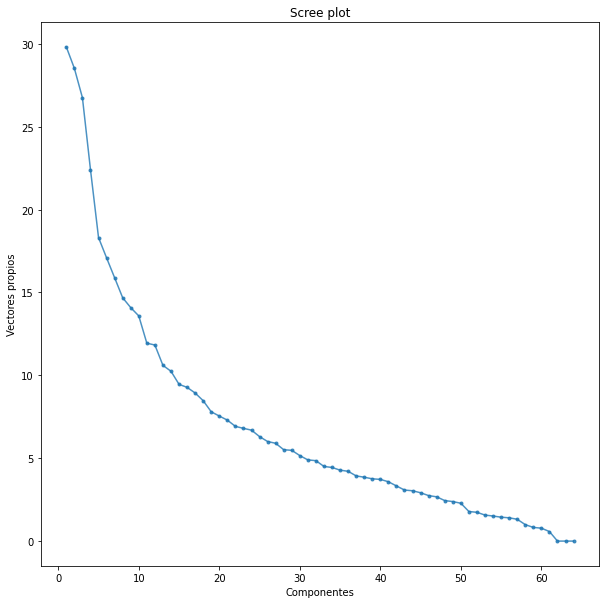

In [ ]:
fig = plt.figure(figsize=(10,10));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
#La nueva base son los vectores propios de la matriz de covarianza.
y_label = plt.ylabel('Vectores propios');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

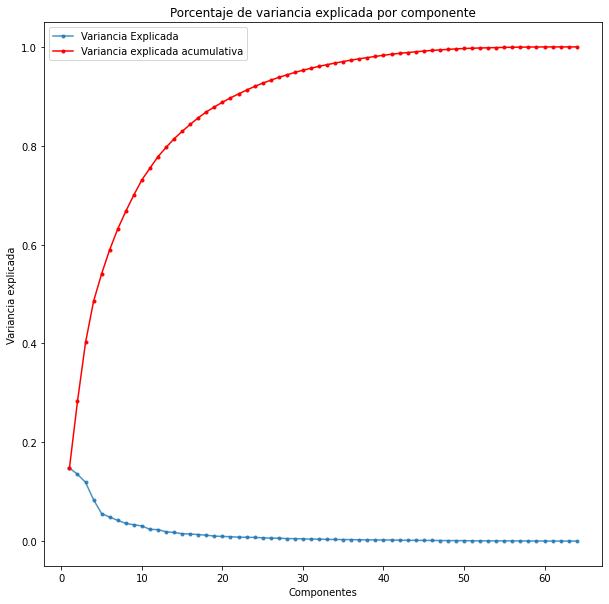

In [ ]:
fig = plt.figure(figsize=(10,10));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

#### Pesos que le asigna el PCA a cada componente visualizado con un heatmap

Podemos ver que sí que existen bastantes correlaciones entre ciertos píxeles, ya que aparecen fuertes correlaciones entre algunas componentes, como se puede ver en el heatmap. Pero també se puede apreciar que no existen correlaciones entre muchos de estos.

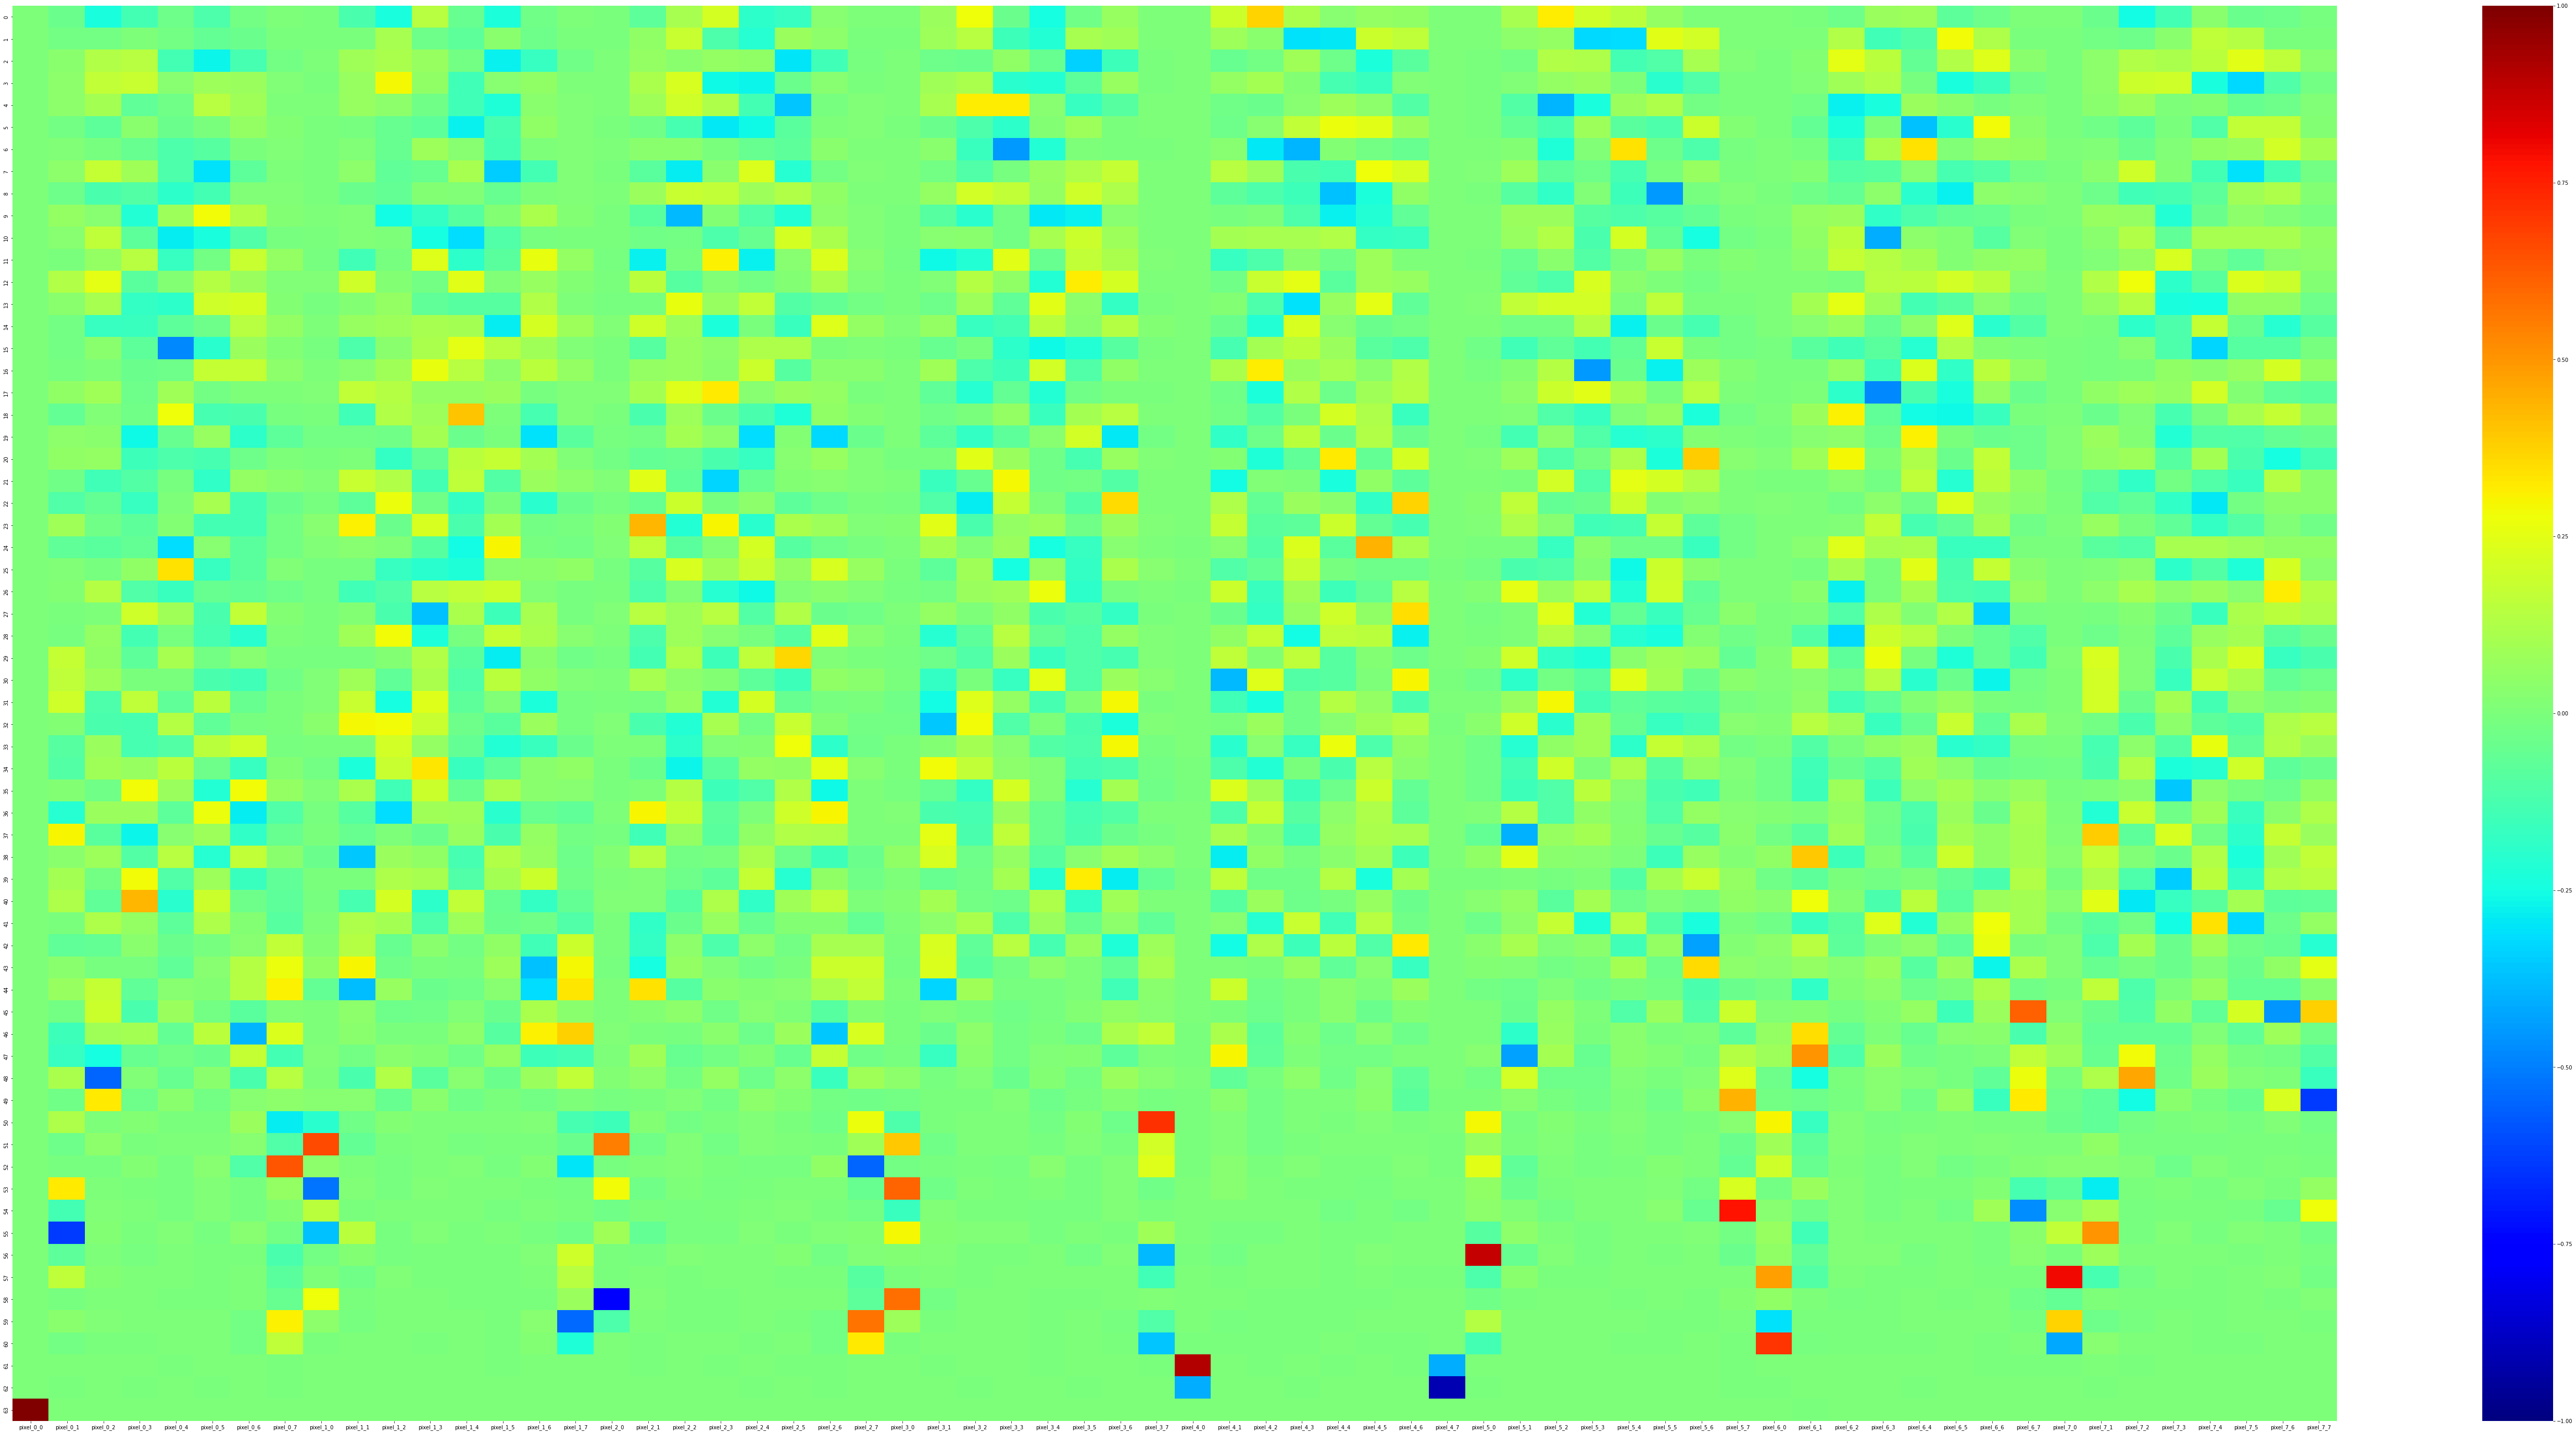

In [ ]:
fig, ax = plt.subplots(figsize=(100,50))
sns.heatmap(myPCA.components_, cmap='jet', xticklabels=list(X_train_standarized[X_train.columns]), vmin=-np.max(np.abs(myPCA.components_)), vmax=np.max(np.abs(myPCA.components_)))

#### Transformamos nuestro conjunto de datos utilizando el PCA

<a name="PCA-original"></a>

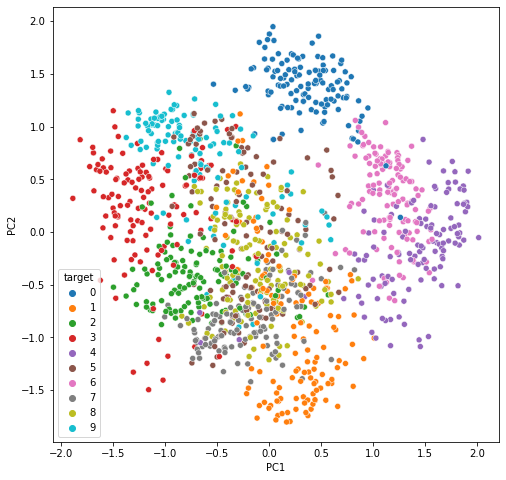

In [ ]:

transformed_train = myPCA.transform(X_train_standarized[X_train.columns])
transformed_train

X_train_standarized[['PC1','PC2','PC3']] = transformed_train[:,:3]

fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=X_train_standarized, hue=y_train, palette='tab10')

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X_train_standarized, x='PC1', y='PC2', z='PC3',color=y_train)
fig.show()

In [ ]:
loadings = myPCA.components_.T * np.sqrt(myPCA.explained_variance_ratio_)

fig = px.scatter(X_train_standarized, x='PC1', y='PC2', color=y_train)

for i, feature in enumerate(X_train.columns):
    fig.add_shape(type='line',x0=0, y0=0,x1=loadings[i, 0],y1=loadings[i, 1])
    fig.add_annotation(x=loadings[i, 0],y=loadings[i, 1],ax=0, ay=0,xanchor="center",yanchor="bottom",text=feature,)
fig.show()

Podemos apreciar que tenemos una bastante buena separabilidad de las clases. Esta se puede apreciar sobretodo en el primer plot que hemos realizado ya que algunas de las clases parecen tener una buena interseparabilidad. Como es el caso de la clase del 0,3,4,6,9. 

Por otro lado, podemos ver que la clase del 5 no se distinge muy bien de la del 9. Además parece haber un popurri bastante grande entre muchas clases, donde tenemos una nube de puntos grande con bastantes clases involucradas. Esto se debe al gran parecido a la hora de escribir ciertos dígitos. Ya que por ejemplo, algunas personas realizan una escritura de estos de forma que puede llegar a parecer otro número. Vimos esto también en un problema individual de la tercera lista. 

#### Ante esta situación se nos ocurre realizar un t-SNE ya que como usa distancias alomejor nos permite tener en cuenta ciertas no linearidades en los datos.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



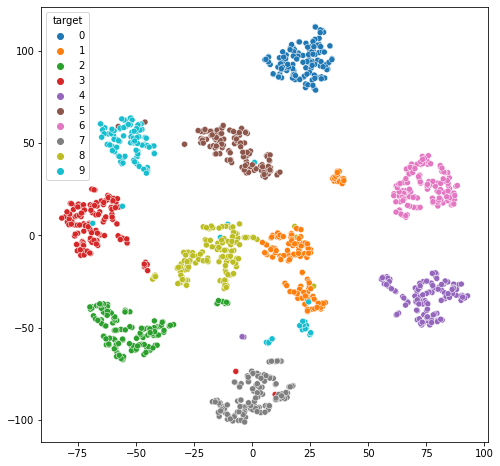

In [ ]:
from sklearn.manifold import TSNE

transformed_train = TSNE(n_components=2, perplexity=10, n_iter=2000, init='pca').fit_transform(X_train_standarized[X_train.columns])

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=transformed_train[:,0], y=transformed_train[:,1], hue=y_train, palette='tab10');

En efecto, obtenemos una clara visualización de la separabilidad entre clases que esperábamos ya que vemos un patrón de grupos claro auqnue también es cierto que tenemos pequeños grupos de distintas clases de dígitos que parecen agruparse debido a su parecido de escritura. 

Por lo tanto vemos que el conjunto de datos es ciertamente sencillo de clasificar correctamente al menos con los píxeles que tenemos. t-SNE nos ha podido capturar las no linealidades y nos muestra una clara separación de los diez dígitos.

### b) Fijad el tamaño de la capa intermedia a 2 y experimentad con algunos tamaños para las otras capas ocultas (siempre una potencia de 2) usando como funciones de activación $\texttt{linear, sigmoid y relu}$. Para mantener bajo el tiempo de entrenamiento, el tamaño del lote puede ser grande (alrededor de 100), el número de épocas debe ser del orden de miles, usad los experimentos con la función de activación lineal para fijar estos valores.
#### Calculad el error cuadrático (MSE) final después de entrenar las redes para los datos de entrenamiento y los datos de test como la media de las diferencias cuadráticas entre los datos y las predicciones.

En esta sección, evaluaremos el rendimiento de la red utilizando varias funciones de activación junto con un cierto número de capas ocultas. Para ello, ejecutaremos la red durante un número suficiente de **EPOCHS** e iremos computando los resultados. Hemos ido probando el número adecuado de **EPOCHS** mediante pruebas para ver si con un número mañor de **EPOCHS** podíamos obtener mejores valores de **train_loss** y **val_loss loss**. Para garantizar la coherencia en todos los modelos y para manter bajo el tiempo de entrenamiento, hemos fijado el tamaño del **BATCH** en *100* para todos los experimentos.

Debido a que generaremos distintas redes, nos interesa poder ver de forma minuciosa cuáles son sus diferencias sustanciales, es por eso que nos interesa experimentar para un amplio y distinto número de capas ocultas junto con un valor que tenga un mínim sentido para las **EPOCHS**:

Es por eso que hemos considerado para cada función de activación, probar:

Número de capas ocultas de: [2,4,8,16,32,64] </br>
Número de epochs: Hemos dejado el valor final que nos daba un valor razonable, ya que a veces aunque aumentásemos el número el **EPOCHS** no mejoraban los valores de pérdida(**loss** y **val_loss**) de la red para ambos conjuntos


Para cada función de activación y para cada número de capas ocultas hemos obtenido los siguientes parámetros:

* **train_error**: error cuadrático (MSE) final después de entrenar la red para los datos de entrenamiento
* **test_error**: error cuadrático (MSE) final después de entrenar la red para los datos de test
* **best train_loss epoch result**: Número de epochs cuando obtenemos el mejor valor de train_loss
* **best train_loss loss result**: Mejor valor de pérdida de la red para el conjunto de datos de entramiento
* **best val_loss epoch result**: Número de epochs en cuando obtenemos el mejor valor de val_loss
* **best val_loss loss result**: Mejor valor de pérdida de la red para el conjunto de datos de validación  

Al utilizar la función de activación lineal, hemos obtenido los siguientes resultados:

#### **Función de activación $\texttt{linear}$**

dict_keys(['loss', 'val_loss'])


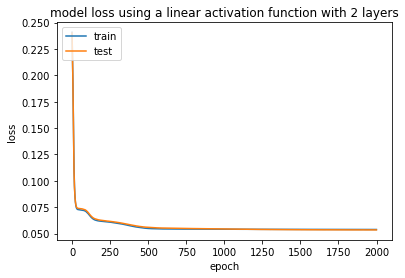

17/17 [==============================] - 0s 1ms/step
Nb layers: 2
train_error: 0.05371176124318168
test_error: 0.05391450095621882
best train_loss epoch result: 1984
best train_loss loss result: 0.05383610725402832
best val_loss epoch result: 1995
best val_loss loss result: 0.05343339219689369
dict_keys(['loss', 'val_loss'])


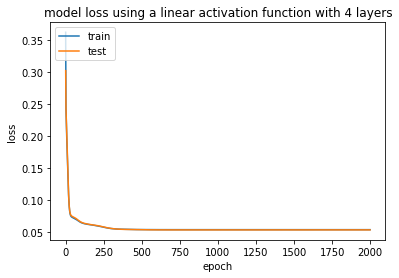

17/17 [==============================] - 0s 2ms/step
Nb layers: 4
train_error: 0.05370153797552643
test_error: 0.0537573247022301
best train_loss epoch result: 1777
best train_loss loss result: 0.05381830036640167
best val_loss epoch result: 799
best val_loss loss result: 0.05341159924864769
dict_keys(['loss', 'val_loss'])


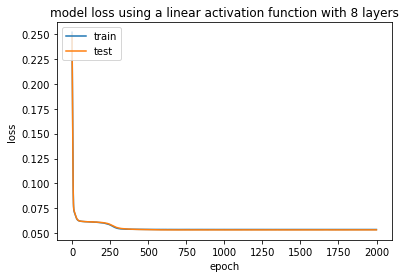

17/17 [==============================] - 0s 1ms/step
Nb layers: 8
train_error: 0.053710311659398116
test_error: 0.05376524345592228
best train_loss epoch result: 1812
best train_loss loss result: 0.053824689239263535
best val_loss epoch result: 1117
best val_loss loss result: 0.0534188449382782
dict_keys(['loss', 'val_loss'])


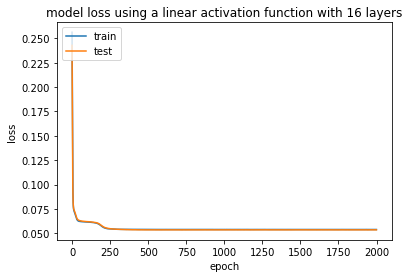

17/17 [==============================] - 0s 1ms/step
Nb layers: 16
train_error: 0.05371104400794734
test_error: 0.05377792780349875
best train_loss epoch result: 1868
best train_loss loss result: 0.05382580682635307
best val_loss epoch result: 584
best val_loss loss result: 0.053408183157444
dict_keys(['loss', 'val_loss'])


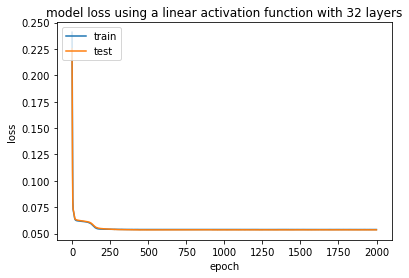

17/17 [==============================] - 0s 1ms/step
Nb layers: 32
train_error: 0.05373509507516825
test_error: 0.0537614878517219
best train_loss epoch result: 1881
best train_loss loss result: 0.053832393139600754
best val_loss epoch result: 518
best val_loss loss result: 0.05347869545221329
dict_keys(['loss', 'val_loss'])


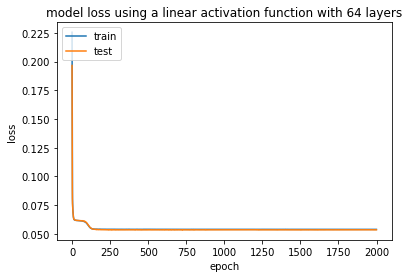

17/17 [==============================] - 0s 1ms/step
Nb layers: 64
train_error: 0.053722491745080876
test_error: 0.053818799884698676
best train_loss epoch result: 1741
best train_loss loss result: 0.053841978311538696
best val_loss epoch result: 413
best val_loss loss result: 0.053393296897411346


In [ ]:
#Pruebas para tener la mejor red lineal

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 2000
BATCH_SIZE = 100
sizes_int_layer = [2,4,8,16,32,64]#,8,16,32]#,8,16,32,...] #probar a tener capas mas grandes
act = 'linear' 

train_error = list(range(len(sizes_int_layer)))
test_error = list(range(len(sizes_int_layer)))

for i, intermediate in enumerate(sizes_int_layer):
    entrada = keras.Input(shape=(64,))
    codificar = keras.layers.Dense(intermediate, activation=act)(entrada)
    codificar = keras.layers.Dense(2, activation=act)(codificar) #fijar d2 a 2
    decodificar = keras.layers.Dense(intermediate, activation=act)(codificar)
    decodificar = keras.layers.Dense(64, activation=act)(decodificar)
    autocodificador = keras.Model(entrada, decodificar)
    codificador = keras.Model(entrada, codificar)

    autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
    history = autocodificador.fit(X_train, X_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)

    print(history.history.keys())

    #plot de loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("model loss using a "+act+" activation function with "+str(intermediate)+" layers")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #.predict
    X_train_pred = autocodificador.predict(X_train)
    X_test_pred = autocodificador.predict(X_test)

    #calcular el MSE despúes de entrenar las redes
    train_er = mean_squared_error(X_train, X_train_pred)
    test_er = mean_squared_error(X_test, X_test_pred)

    train_error[i] = train_er
    test_error[i] = test_er

    #MSE i número de capas
    print("Nb layers:", intermediate)
    print("train_error:", train_er)
    print("test_error:", test_er)

    #training data
    print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
    print("best train_loss loss result:", min(history.history['loss']))

    #cross-validation data
    print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
    print("best val_loss loss result:", min(history.history['val_loss']))


De entre todas las configuraciones posibles que hemos obtenido, podemos notar que obtenemos valores bastante parecidos para los valores de **train_error** y **test_error**.

Además también valores muy semejantes en los valores mínimos de los plots tanto para el conjunto de entrenamiento como para el conjunto de test. Ya que si nos fijamos la diferencia muchas veces no ocurre hasta el cuarto o quinto decimal.

Si tomamos atención y nos fijamos en todas las configuraciones, vemos que tenemos la mejor red con **64 capas ocultas** y para los parámetros:

* train_error: 0.053722491745080876
* test_error: 0.053818799884698676
* best train_loss loss result: 0.053841978311538696
* best val_loss loss result: 0.053393296897411346
* best val_loss epoch result: 413
* best train_loss epoch result: 1741

Esta es la mejor ya que obtenemos el mejor valor de pérdida para el conjunto de test, dándonos un valor de: 0.053393296897411346 y además llega a esta valor un número realtivamente pequeño de EPOCHS, ya que con 413 parece que le basta.

Aunque también cabe destacar que debido al tamaño de red y que los errores de validación obtenidos no divergen demasiado y que para otra ejecución los valores cambiarian ligeramente, podríamos obtar por elegir otra red con un número menor de capas, como podrían ser la red con un número de capas de tamaño 16 o 32.

Además cabe destacar que para todas las redes tenemos un error de entrenamiento y test parecido, lo que nos señala que no estamos tampoco teniendo modelos que sobreajusten al tratar con datos que no hemos visto todavía. Por lo tanto nuestros modelos generalizan de forma adecuada.

#### **Función de activación $\texttt{sigmoid}$**

dict_keys(['loss', 'val_loss'])


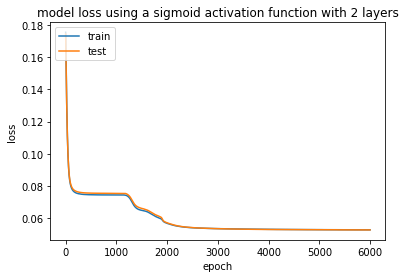

17/17 [==============================] - 0s 1ms/step
Nb layers: 2
train_error: 0.052865314235942325
test_error: 0.053359063823176935
best train_loss epoch result: 5989
best train_loss loss result: 0.052873656153678894
best val_loss epoch result: 5987
best val_loss loss result: 0.05282934010028839
dict_keys(['loss', 'val_loss'])


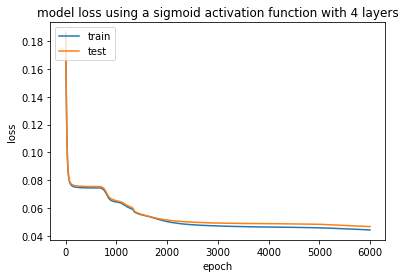

17/17 [==============================] - 0s 1ms/step
Nb layers: 4
train_error: 0.04509314235795188
test_error: 0.04655352735918601
best train_loss epoch result: 5999
best train_loss loss result: 0.044382888823747635
best val_loss epoch result: 5999
best val_loss loss result: 0.04676317423582077
dict_keys(['loss', 'val_loss'])


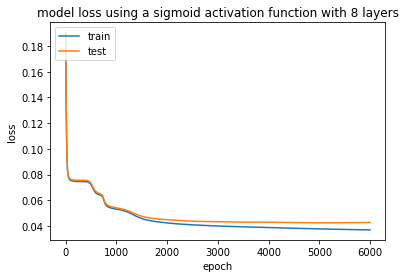

17/17 [==============================] - 0s 4ms/step
Nb layers: 8
train_error: 0.03869225854530111
test_error: 0.04170401916456308
best train_loss epoch result: 5998
best train_loss loss result: 0.03695600479841232
best val_loss epoch result: 5118
best val_loss loss result: 0.04246336966753006
dict_keys(['loss', 'val_loss'])


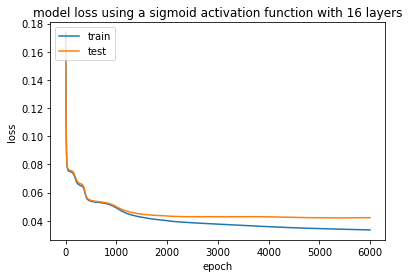

17/17 [==============================] - 0s 3ms/step
Nb layers: 16
train_error: 0.03610179951849464
test_error: 0.041017667358237156
best train_loss epoch result: 5998
best train_loss loss result: 0.033494796603918076
best val_loss epoch result: 5254
best val_loss loss result: 0.04201174154877663
dict_keys(['loss', 'val_loss'])


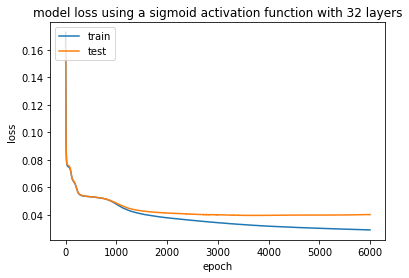

17/17 [==============================] - 0s 1ms/step
Nb layers: 32
train_error: 0.03225414663614189
test_error: 0.03905645425745416
best train_loss epoch result: 5998
best train_loss loss result: 0.02890222892165184
best val_loss epoch result: 3744
best val_loss loss result: 0.0394270196557045
dict_keys(['loss', 'val_loss'])


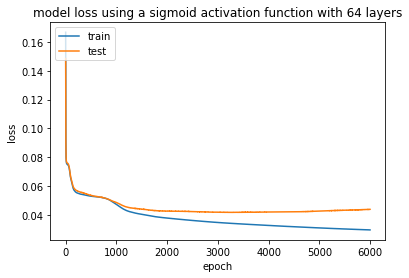

17/17 [==============================] - 0s 1ms/step
Nb layers: 64
train_error: 0.03371849175331276
test_error: 0.03943716196805287
best train_loss epoch result: 5996
best train_loss loss result: 0.029444465413689613
best val_loss epoch result: 3352
best val_loss loss result: 0.04161589592695236


In [ ]:
#Pruebas para tener la mejor red sigmoid

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 6000
BATCH_SIZE = 100
sizes_int_layer = [2,4,8,16,32,64]#,8,16,32]#,8,16,32,...] #probar a tener capas mas grandes
act = 'sigmoid' 

train_error = list(range(len(sizes_int_layer)))
test_error = list(range(len(sizes_int_layer)))

for i, intermediate in enumerate(sizes_int_layer):
    entrada = keras.Input(shape=(64,))
    codificar = keras.layers.Dense(intermediate, activation=act)(entrada)
    codificar = keras.layers.Dense(2, activation=act)(codificar) #fijar d2 a 2
    decodificar = keras.layers.Dense(intermediate, activation=act)(codificar)
    decodificar = keras.layers.Dense(64, activation=act)(decodificar)
    autocodificador = keras.Model(entrada, decodificar)
    codificador = keras.Model(entrada, codificar)

    autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
    history = autocodificador.fit(X_train, X_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)#validation_data=(X_test, y_test))

    print(history.history.keys())

    #plot de loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("model loss using a "+act+" activation function with "+str(intermediate)+" layers")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #.predict
    X_train_pred = autocodificador.predict(X_train)
    X_test_pred = autocodificador.predict(X_test)

    #calcular el MSE después de entrenar las redes
    train_er = mean_squared_error(X_train, X_train_pred)
    test_er = mean_squared_error(X_test, X_test_pred)

    train_error[i] = train_er
    test_error[i] = test_er

    #MSE i número de capas
    print("Nb layers:", intermediate)
    print("train_error:", train_er)
    print("test_error:", test_er)

    #training data
    print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
    print("best train_loss loss result:", min(history.history['loss']))

    #cross-validation data
    print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
    print("best val_loss loss result:", min(history.history['val_loss']))

De entre todas las configuraciones posibles que hemos obtenido, podemos notar que obtenemos valores bastante parecidos para los valores de **train_error** y **test_error** aunque ahora a medida que vamos augmentado el tañano de las capas, nuestros errores disminuyen en consecuencia. 

Como también lo hacen los valores mínimos de los plots, aunque no para todos los tamaños de capas ocultas, a medida que vamos augmentando el número de capas, a partir de 64 podemos ver que ahora nuestro mínimo valor de **val_loss** ha augmentado.


Si tomamos atención y nos fijamos en todas las configuraciones, vemos que tenemos la mejor red con **32 capas ocultas** y para los parámetros:

* train_error: 0.03225414663614189
* test_error: 0.03905645425745416
* best train_loss epoch result: 5998
* best train_loss loss result: 0.02890222892165184
* best val_loss epoch result: 3744
* best val_loss loss result: 0.0394270196557045

Esta es la mejor ya que obtenemos el mejor valor de pérdida para el conjunto de test, dándonos un valor de: 0.0394270196557045 y con un número de 3774 epochs. Este número es mucho mayor que el obtenido que para la función de activación lineal, auqnue el valor de pérdida mínimo para el conjunto de test de esta función sigmoidea es mucho menor y por lo tanto, mejor.

Además cabe destacar que a medida que augmentamos el tamaño de las redes y el número de epochs augmenta, lo que ocurre es que nuestras arquitecturas van sobreajustando los datos, ya que como podemos observar la diferencia que tenemos en el error de entrenamiento y test parece irse distanciando. De echo se puede ver de forma clara en los plots para cada red.

#### **Función de activación $\texttt{relu}$**

dict_keys(['loss', 'val_loss'])


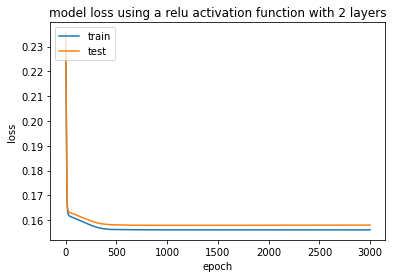

17/17 [==============================] - 0s 2ms/step
Nb layers: 2
train_error: 0.1566526678579979
test_error: 0.1554884874404816
best train_loss epoch result: 2899
best train_loss loss result: 0.1560705602169037
best val_loss epoch result: 1132
best val_loss loss result: 0.15792445838451385
dict_keys(['loss', 'val_loss'])


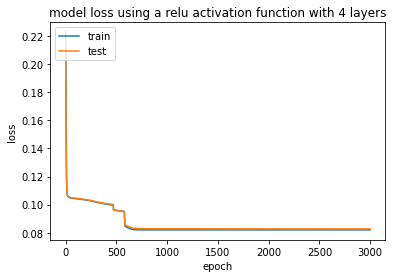

17/17 [==============================] - 0s 1ms/step
Nb layers: 4
train_error: 0.08220289725407495
test_error: 0.08164346676779108
best train_loss epoch result: 2245
best train_loss loss result: 0.08198095858097076
best val_loss epoch result: 2689
best val_loss loss result: 0.0827237069606781
dict_keys(['loss', 'val_loss'])


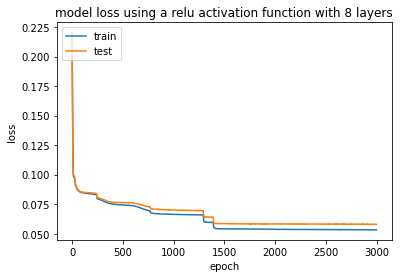

17/17 [==============================] - 0s 1ms/step
Nb layers: 8
train_error: 0.05459454226816499
test_error: 0.05602063083892067
best train_loss epoch result: 2998
best train_loss loss result: 0.053210966289043427
best val_loss epoch result: 2999
best val_loss loss result: 0.05790182575583458
dict_keys(['loss', 'val_loss'])


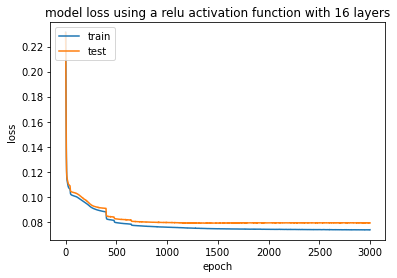

17/17 [==============================] - 0s 3ms/step
Nb layers: 16
train_error: 0.07522658097738152
test_error: 0.07770008952868895
best train_loss epoch result: 2951
best train_loss loss result: 0.07356319576501846
best val_loss epoch result: 1515
best val_loss loss result: 0.07891987264156342
dict_keys(['loss', 'val_loss'])


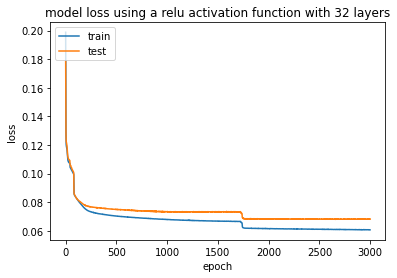

17/17 [==============================] - 0s 1ms/step
Nb layers: 32
train_error: 0.06283332002512794
test_error: 0.06736168676526241
best train_loss epoch result: 2986
best train_loss loss result: 0.06056256592273712
best val_loss epoch result: 2658
best val_loss loss result: 0.06790992617607117
dict_keys(['loss', 'val_loss'])


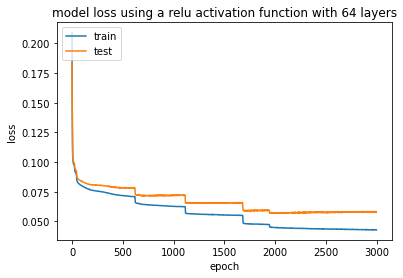

17/17 [==============================] - 0s 1ms/step
Nb layers: 64
train_error: 0.04732350998969359
test_error: 0.05700943991739691
best train_loss epoch result: 2978
best train_loss loss result: 0.0428948812186718
best val_loss epoch result: 1990
best val_loss loss result: 0.056848540902137756


In [ ]:
#Pruebas para tener la mejor red relu

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 3000
BATCH_SIZE = 100
sizes_int_layer = [2,4,8,16,32,64]#,8,16,32]#,8,16,32,...] #probar a tener capas mas grandes
act = 'relu' 

train_error = list(range(len(sizes_int_layer)))
test_error = list(range(len(sizes_int_layer)))

for i, intermediate in enumerate(sizes_int_layer):
    entrada = keras.Input(shape=(64,))
    codificar = keras.layers.Dense(intermediate, activation=act)(entrada)
    codificar = keras.layers.Dense(2, activation=act)(codificar) #fijar d2 a 2
    decodificar = keras.layers.Dense(intermediate, activation=act)(codificar)
    decodificar = keras.layers.Dense(64, activation=act)(decodificar)
    autocodificador = keras.Model(entrada, decodificar)
    codificador = keras.Model(entrada, codificar)

    autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
    history = autocodificador.fit(X_train, X_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)#validation_data=(X_test, y_test))

    print(history.history.keys())

    #plot de loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("model loss using a "+act+" activation function with "+str(intermediate)+" layers")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #.predict
    X_train_pred = autocodificador.predict(X_train)
    X_test_pred = autocodificador.predict(X_test)

    #calcular el MSE després d'entrenar les xarxes per les dades d'entrament i test com la 
    #mitja de les diferències quadràtiques entres les dades i les prediccions
    train_er = mean_squared_error(X_train, X_train_pred)
    test_er = mean_squared_error(X_test, X_test_pred)

    train_error[i] = train_er
    test_error[i] = test_er

    #MSE i número de capas
    print("Nb layers:", intermediate)
    print("train_error:", train_er)
    print("test_error:", test_er)

    #training data
    print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
    print("best train_loss loss result:", min(history.history['loss']))

    #cross-validation data
    print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
    print("best val_loss loss result:", min(history.history['val_loss']))

Ahora finalmente pasamos a la función de activación $\texttt{relu}$.

Esta función parece comportarse de forma un poco diferente a las otras dos anteriores, ya que esta vez, la perdida del modelo parece caer o bajar de forma más vertical ya que se puede ver que para un número menor de epochs parece converger de forma más rápida.

Como también lo hacen los valores mínimos de los plots, aunque no para todos los tamaños de capas ocultas, a medida que vamos augmentando el número de capas, a partir de 64 podemos ver que ahora nuestro mínimo valor de **val_loss** ha augmentado.


Si tomamos atención y nos fijamos en todas las configuraciones, vemos que tenemos la mejor red con **64 capas ocultas** y para los parámetros:

* train_error: 0.04732350998969359
* test_error: 0.05700943991739691
* best train_loss epoch result: 2978
* best train_loss loss result: 0.0428948812186718
* best val_loss epoch result: 1990
* best val_loss loss result: 0.056848540902137756

Esta es la mejor ya que obtenemos el mejor valor de pérdida para el conjunto de test, dándonos un valor de: 0.056848540902137756 y con un número de 1990 epochs. Este número es mucho mayor que el obtenido que para la función de activación lineal, pero menor que para la función sigmoidea.

Además cabe destacar que a medida que augmentamos el tamaño de las redes y el número de epochs augmenta, lo que ocurre es que nuestras arquitecturas van sobreajustando los datos, no de forma tant significativa como lo hacia la función sigmoid, pero para un número de 64 capas ocultas si que podemos notar la diferencia de este sobreajuste en la diferencia que tenemos en el error de entrenamiento y test. Otra vez, se puede ver de forma clara estas diferencias en los plots para cada red.

#### **RESULTADOS DE LAS MEJORES REDES**


| Función de Activación | Hidden Layers | loss | loss epochs | val_loss |val_loss epochs | train_error | test_error| 
|---|---	|---	|---	|---	|---	| ----| ----|
|Linear|64	|0.053841978311538696	|1741	|0.053393296897411346	|413	| 0.053722491745080876| 0.053818799884698676|
|Sigmoid|32	|0.02890222892165184	|5998	|0.0394270196557045	|3744	| 0.03225414663614189| 0.03905645425745416|
|ReLU|64|0.0428948812186718	| 2978 | 0.056848540902137756|1990	|0.04732350998969359| 0.05700943991739691|

Podemos ver que en general nuestras redes obtienen bastate buenos resultados.

Por un lado podemos ver que la red que se comporta mejor es la que tiene como función de activación la función sigmoidea.

Por otro lado, en nuestra rede Linear, esta no tiene a sobreajustar los datos, como si que vemos que en comparación tanto la Sigmoid como la ReLU para un número mayor de hidden layers empiezan a hacerlo.

**Vemos que la mejor red pues es la que usa la función Sigmoid, con 32 capas ocultas, que alcanza el mínimo valor de val_loss en un número de 3744 epochs y que tiene los mejores error con diferencia de tanto el error de train y de test.**

### b.1) Para cada función de activación, para la red con el mejor error cuadrático, representad las predicciones 2D para los datos de entrenamiento usando la red $\texttt{codificador}$. ¿Alguna de las funciones de activación ayuda a la separabilidad de las clases en 2D? Calculad el PCA de los datos y comparad los resultados de los primeros 2 componentes con los resultados del codificador. ¿Alguna de las redes produce una salida similar? Buscad en Google la relación entre PCA y auto-codificadores y explicad brevemente lo que encontréis.

#### **Mejor red con la función de activación $\texttt{linear}$**

dict_keys(['loss', 'val_loss'])


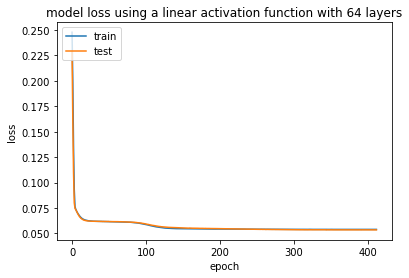

17/17 [==============================] - 0s 2ms/step
Nb layers: 64
train_error: 0.05371611246623984
test_error: 0.053833568407888624
best train_loss epoch result: 405
best train_loss loss result: 0.05386112257838249
best val_loss epoch result: 344
best val_loss loss result: 0.05340052396059036


In [ ]:
#Pruebas para tener la mejor red lineal obtenidos del apartado anterior - linear

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 413 
BATCH_SIZE = 100
sizes_int_layer = [64]
act = 'linear' 

train_error = list(range(len(sizes_int_layer)))
test_error = list(range(len(sizes_int_layer)))

for i, intermediate in enumerate(sizes_int_layer):
    entrada = keras.Input(shape=(64,))
    codificar = keras.layers.Dense(intermediate, activation=act)(entrada)
    codificar = keras.layers.Dense(2, activation=act)(codificar) #fijar d2 a 2
    decodificar = keras.layers.Dense(intermediate, activation=act)(codificar)
    decodificar = keras.layers.Dense(64, activation=act)(decodificar)
    autocodificador = keras.Model(entrada, decodificar)
    codificador_lineal = keras.Model(entrada, codificar)

    autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
    history = autocodificador.fit(X_train, X_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)#validation_data=(X_test, y_test))

    print(history.history.keys())

    #plot de loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("model loss using a "+act+" activation function with "+str(intermediate)+" layers")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #.predict
    X_train_pred = autocodificador.predict(X_train)
    X_test_pred = autocodificador.predict(X_test)

    #calcular el MSE després d'entrenar les xarxes per les dades d'entrament i test com la 
    #mitja de les diferències quadràtiques entres les dades i les prediccions
    train_er = mean_squared_error(X_train, X_train_pred)
    test_er = mean_squared_error(X_test, X_test_pred)

    train_error[i] = train_er
    test_error[i] = test_er

    #MSE i número de capas
    print("Nb layers:", intermediate)
    print("train_error:", train_er)
    print("test_error:", test_er)

    #training data
    print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
    print("best train_loss loss result:", min(history.history['loss']))

    #cross-validation data
    print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
    print("best val_loss loss result:", min(history.history['val_loss']))

#### **Comparación de la codificación para 10 ejemplos de los datos usando el mejor codificador lineal comparado con los 10 ejemplos de datos**

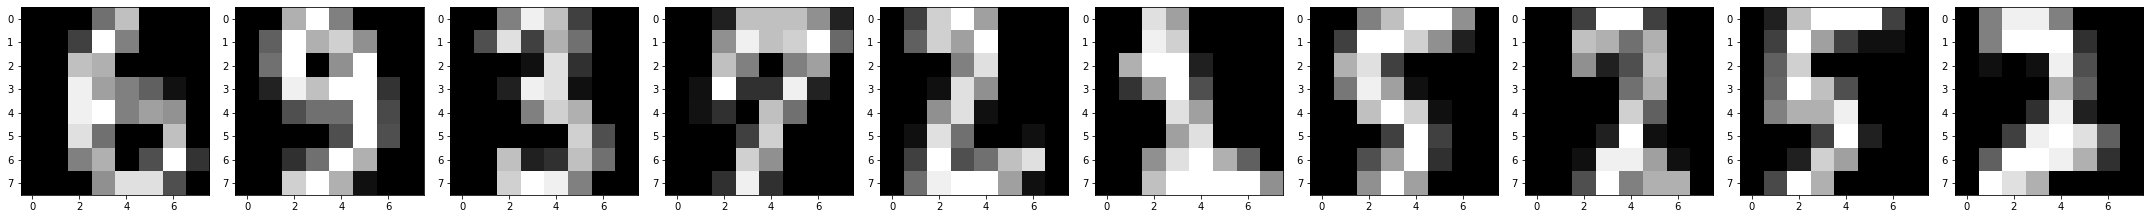

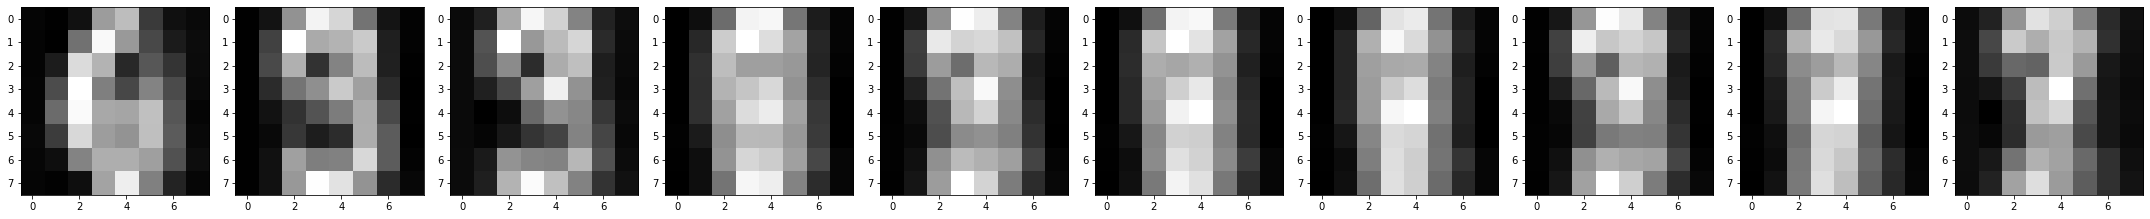

In [ ]:
#lineal
X_test_copia = X_test.copy()
X_test = X_test.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test[:num][i], cmap='gray')
plt.tight_layout()
plt.show()

#Predichos por la red
X_test_pred = X_test_pred.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test_pred[:num][i], cmap='gray')
plt.tight_layout()
plt.show()
X_test = X_test_copia.copy()

En esta codificación, podemos apreciar que el codificador lineal ha producido unos dígitos bastante borrosos comparados con las imágenes de los dígitos originales. Aunque bueno creo que no está nada mal, ya que el codificador lineal no es el que nos ha obtenido tan buenos resultados. Algunos dígitos producidos por el codificdor sí que realmente no se aprecia nada, como es el caso de la imagen 6 y 7. Ni de lejos eso parece un 1 y un 5 respectivamente. O el 3 se puuede llegar a confundir con el 9, como se puede apreciar en la representación del PCA a continuación. 



#### **PCA Lineal**

40/40 [==============================] - 0s 919us/step


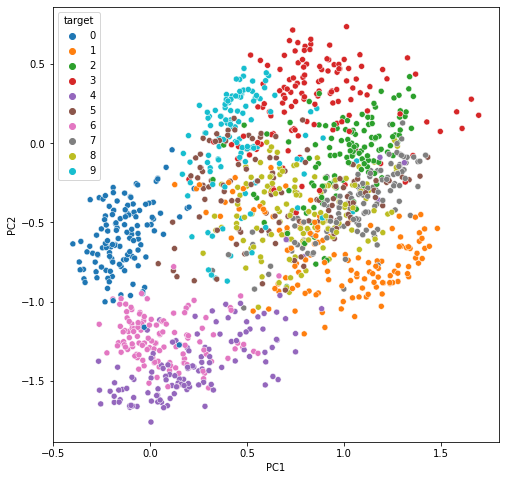

In [ ]:
data_lineal = codificador_lineal.predict(X_train)

X_train_standarized[['PC1','PC2']] = data_lineal[:,:2]

fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=X_train_standarized, hue=y_train, palette='tab10')

Tal y como podemos apreciar en esta repsentación del PCA obtenida con el codificador calculado con la mejor red para la función linear, podemos ver que se obtiene una buena separabilidad para algunas clases. Este PCA tiene mucha cierta semejanza al respecto al PCA original que hemos aplicado sobre los datos de entrenamiento [PCA Original](#PCA-original). Así que este codificador nos realiza un bastante buen trabajo. Aunque tal y como hemos podido observar con el PCA original, muchas clases no tiene una demasiada buena distigibilidad, como es el caso de las clases del 7, 8 y 5. Además algunas clases también estan bastante juntas y no tienen una clara separación, como son las clases del 4 y 6. Las clases más separadas parecen que son las de: 0, 1(aunque no tanto como la del 0) y también la del 2 y 3 se podrían considerar. 

#### **Mejor red con la función de activación $\texttt{sigmoid}$**

dict_keys(['loss', 'val_loss'])


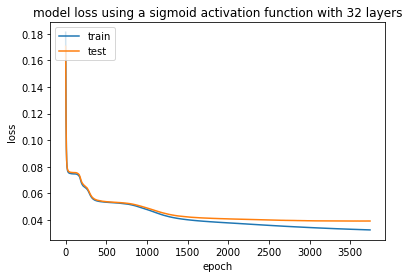

17/17 [==============================] - 0s 1ms/step
Nb layers: 32
train_error: 0.03449796153216286
test_error: 0.03838431646459963
best train_loss epoch result: 3741
best train_loss loss result: 0.032499395310878754
best val_loss epoch result: 3466
best val_loss loss result: 0.03915718197822571


In [ ]:
#Pruebas para tener la mejor red sigmoid

#sigmoid

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 3744
BATCH_SIZE = 100
sizes_int_layer = [32]
act = 'sigmoid' 

train_error = list(range(len(sizes_int_layer)))
test_error = list(range(len(sizes_int_layer)))

for i, intermediate in enumerate(sizes_int_layer):
    entrada = keras.Input(shape=(64,))
    codificar = keras.layers.Dense(intermediate, activation=act)(entrada)
    codificar = keras.layers.Dense(2, activation=act)(codificar) #fijar d2 a 2
    decodificar = keras.layers.Dense(intermediate, activation=act)(codificar)
    decodificar = keras.layers.Dense(64, activation=act)(decodificar)
    autocodificador = keras.Model(entrada, decodificar)
    codificador_sigmoid = keras.Model(entrada, codificar)

    autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
    history = autocodificador.fit(X_train, X_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)#validation_data=(X_test, y_test))

    print(history.history.keys())

    #plot de loss
    plt.plot(history.history['loss'])
    # this error happens when we are not providing validation data to the model, And check the parameters of the model.fit_generator(or model.fit)
    #(train_data, steps_per_epoch,validation_data, validation_steps, epochs,initial_epoch, callbacks)
    plt.plot(history.history['val_loss'])
    plt.title("model loss using a "+act+" activation function with "+str(intermediate)+" layers")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #.predict
    X_train_pred = autocodificador.predict(X_train)
    X_test_pred = autocodificador.predict(X_test)

    #calcular el MSE després d'entrenar les xarxes per les dades d'entrament i test com la 
    #mitja de les diferències quadràtiques entres les dades i les prediccions
    train_er = mean_squared_error(X_train, X_train_pred)
    test_er = mean_squared_error(X_test, X_test_pred)

    train_error[i] = train_er
    test_error[i] = test_er

    #MSE i número de capas
    print("Nb layers:", intermediate)
    print("train_error:", train_er)
    print("test_error:", test_er)

    #training data
    print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
    print("best train_loss loss result:", min(history.history['loss']))

    #cross-validation data
    print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
    print("best val_loss loss result:", min(history.history['val_loss']))

#### **Comparación de la codificación para 10 ejemplos de los datos usando el mejor codificador sigmoid comparado con los 10 ejemplos de datos**

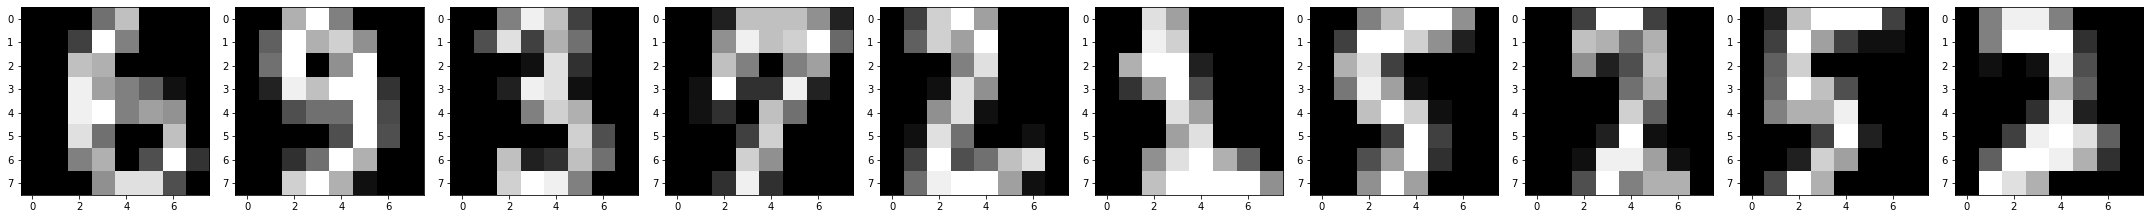

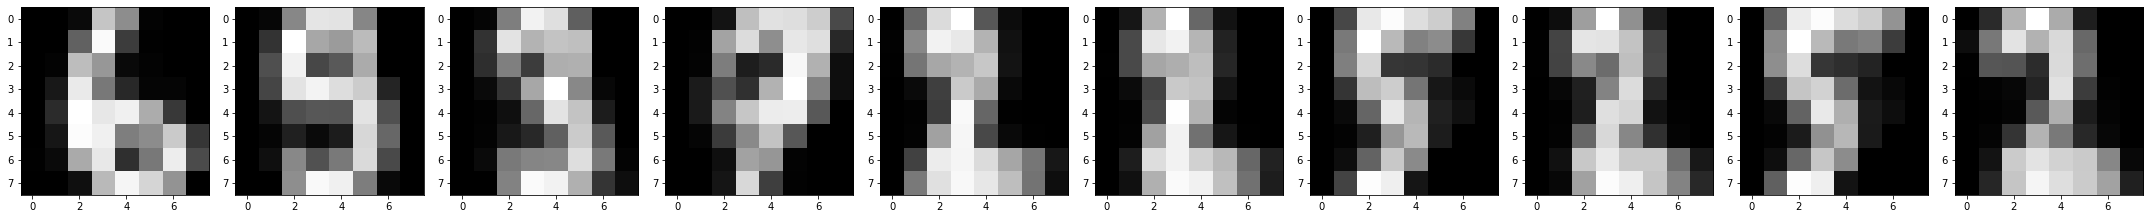

In [ ]:
#sigmoid
X_test_copia = X_test.copy()
X_test = X_test.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test[:num][i], cmap='gray')
plt.tight_layout()
plt.show()

#Predichos por la red
X_test_pred = X_test_pred.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test_pred[:num][i], cmap='gray')
plt.tight_layout()
plt.show()
X_test = X_test_copia.copy()

Obtenemos una buena codificación sin lugar a duda. Este es nuestro mejor codificador de los tres que hemos calculado. La representación no se ve borrosa como pasaba con el codificador linear. 

#### **PCA sigmoid**

<a name="PCA-sigmoid"></a>

40/40 [==============================] - 0s 992us/step


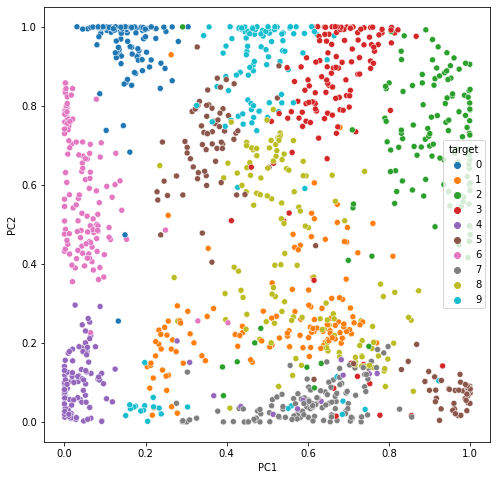

In [ ]:
data_sigmoid = codificador_sigmoid.predict(X_train)

X_train_standarized[['PC1','PC2']] = data_sigmoid[:,:2]

fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=X_train_standarized, hue=y_train, palette='tab10')

Tal y como podemos apreciar en esta repsentación del PCA obtenida con el codificador calculado con la mejor red para la función sigmoid, podemos ver que se obtiene una muy buena separabilidad para casi todas las clases. 

La distribución de este PCA no se parece en nada con respecto al PCA original que hemos aplicado sobre los datos de entrenamiento [PCA Original](#PCA-original) pero sin ninguna duda obtiene una mejor separabilidad de casi todos los dígitos, ya que en la parte inferior de la imagen si que se puede ver que tiene un poco de confusión con ciertos dígitos, ya que hay un popuurri de hasta 6 dígitos distintos. Tambien como pasaba en el PCA anterior, le cuesta un poco saber qué es un 5 y qué es un 9. Ya que tenemos para estas dos clases dos clústeres distintos. O ve de forma clara que es un 9 o un 5 o a veces se puede llegar a confundir.

La forma de esta representación también viene justificada por la concepción del espacio y proyección que hace el autoencoder sigmoideo. Ya que con funciones de activación no lineales permite una proyección no lineal.

Aún así, este codificador sigmoideo es asombrantementte buueno y nos realiza un muy trabajo. Sin lugar a duda como hemos visto en la codificación, casi todos los dígitos se ven de forma nítida y forzando e imaginando un poco podemos distingir sin problema cuál es cuál. 


**Por lo tanto, podemos ver que cómo la no linealidad de los autocodificadores puede ayudar a aislar las señales de las características mejor que el PCA o como es al autoencoder linear.**

#### **Mejor red con la función de activación $\texttt{relu}$**

dict_keys(['loss', 'val_loss'])


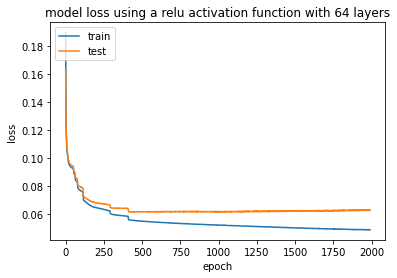

17/17 [==============================] - 0s 1ms/step
Nb layers: 64
train_error: 0.0530995501124554
test_error: 0.06055384354147125
best train_loss epoch result: 1988
best train_loss loss result: 0.04881253466010094
best val_loss epoch result: 619
best val_loss loss result: 0.061623021960258484


In [ ]:
#Pruebas para tener la mejor red relu

#relu

#falta normalitzar les dades que sinó el loss sortia escalat
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 1990
BATCH_SIZE = 100
sizes_int_layer = [64]
act = 'relu' 

train_error = list(range(len(sizes_int_layer)))
test_error = list(range(len(sizes_int_layer)))

for i, intermediate in enumerate(sizes_int_layer):
    entrada = keras.Input(shape=(64,))
    codificar = keras.layers.Dense(intermediate, activation=act)(entrada)
    codificar = keras.layers.Dense(2, activation=act)(codificar) #fijar d2 a 2
    decodificar = keras.layers.Dense(intermediate, activation=act)(codificar)
    decodificar = keras.layers.Dense(64, activation=act)(decodificar)
    autocodificador = keras.Model(entrada, decodificar)
    codificador_relu = keras.Model(entrada, codificar)

    autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
    #mirar a poque el X_test no coge los datos normalizados cuando uso el #validation_data=(X_test, y_test)
    history = autocodificador.fit(X_train, X_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)#validation_data=(X_test, y_test))

    print(history.history.keys())

    #plot de loss
    plt.plot(history.history['loss'])
    # this error happens when we are not providing validation data to the model, And check the parameters of the model.fit_generator(or model.fit)
    #(train_data, steps_per_epoch,validation_data, validation_steps, epochs,initial_epoch, callbacks)
    plt.plot(history.history['val_loss'])
    plt.title("model loss using a "+act+" activation function with "+str(intermediate)+" layers")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #.predict
    X_train_pred = autocodificador.predict(X_train)
    X_test_pred = autocodificador.predict(X_test)

    #calcular el MSE després d'entrenar les xarxes per les dades d'entrament i test com la 
    #mitja de les diferències quadràtiques entres les dades i les prediccions
    train_er = mean_squared_error(X_train, X_train_pred)
    test_er = mean_squared_error(X_test, X_test_pred)

    train_error[i] = train_er
    test_error[i] = test_er

    #MSE i número de capas
    print("Nb layers:", intermediate)
    print("train_error:", train_er)
    print("test_error:", test_er)

    #training data
    print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
    print("best train_loss loss result:", min(history.history['loss']))

    #cross-validation data
    print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
    print("best val_loss loss result:", min(history.history['val_loss']))

#### **Comparación de la codificación para 10 ejemplos de los datos usando el mejor codificador ReLU comparado con los 10 ejemplos de datos**

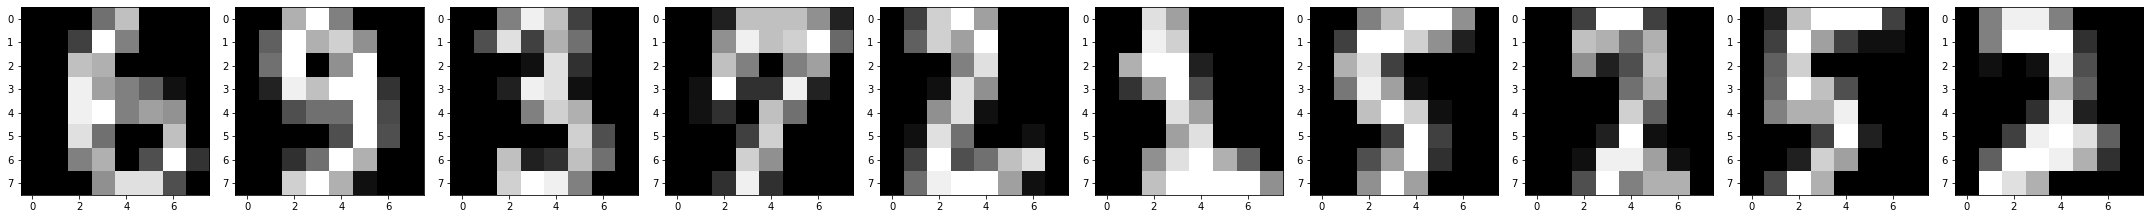

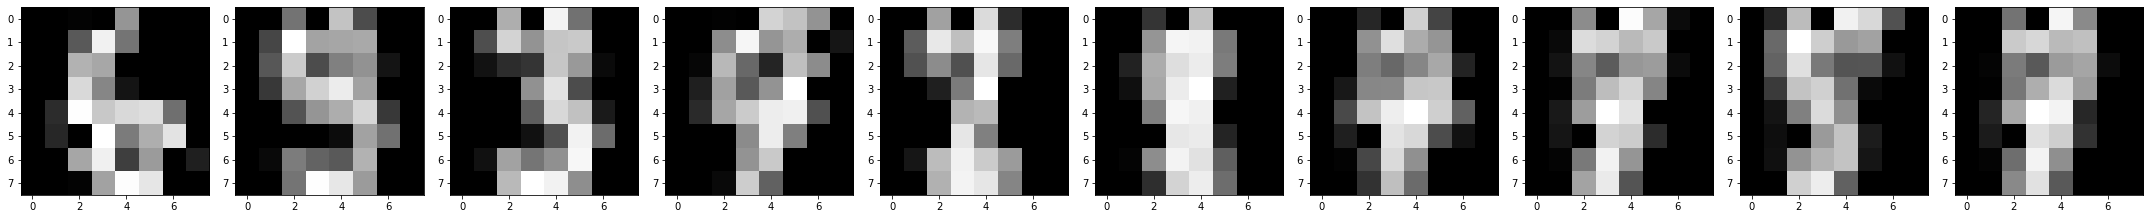

In [ ]:
#relu
X_test_copia = X_test.copy()
X_test = X_test.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test[:num][i], cmap='gray')
plt.tight_layout()
plt.show()

#Predichos por la red
X_test_pred = X_test_pred.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test_pred[:num][i], cmap='gray')
plt.tight_layout()
plt.show()
X_test = X_test_copia.copy()

No cabe ninguna duda que este es nuestro peor codificador, ya que no se aprecia de forma clara la forma de la mayoria de los dígitos representados. Haciendo un gran esfuerzo para el 6,9 y 3, con el último 5 se puede ver cuál es cual pero con el 7, el 2 el 1, y el primer 5 no se pueden distingir en ningún caso. Ahora no es que tengamos una repsentación borrosa como ocurria con el codificador linear, pero lo que ocurre es que simplemente la degradacón del color del píxel no es la correcta, lo que hace que nos cueste a mares ver la forma de los dígitos.

#### **PCA ReLU**

40/40 [==============================] - 0s 932us/step


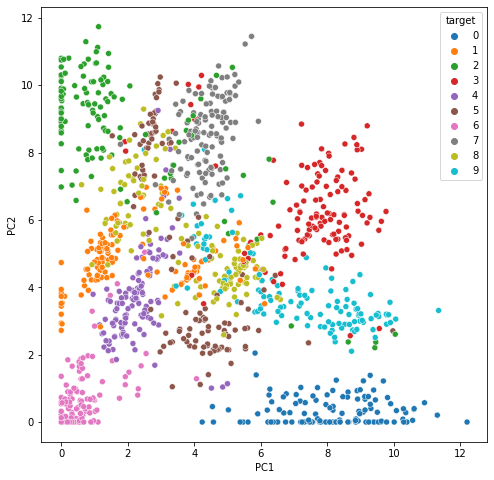

In [ ]:
data_relu = codificador_relu.predict(X_train)

X_train_standarized[['PC1','PC2']] = data_relu[:,:2]

fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=X_train_standarized, hue=y_train, palette='tab10')

Bueno a simple vista no parece que tengamos una muy mala separabilidad de las clases, y además parece que para algunos dígitos lo tiene muy claro, como es el caso del 0, del 2 o 3, o del 6. 
 
La distribución de este PCA tampoco se parece en nada con respecto al PCA original que hemos aplicado sobre los datos de entrenamiento [PCA Original](#PCA-original). Esto es así por la concepción del espacio que usa el codificador ReLU. Seria interesante ver el gráfico de los loadings para ver qué ocurre en este espacio.

Aún así, este codificador sigmoideo es bueno y nos realiza un buen trabajo. Aunque como hemos visto en la codificación muchos dígitos no se ven claramente bien. En la codificacó no hemos visto uun ejemplo de dígito 0, pero se podria distingir, como vemos con el 3 o el 6.

#### **Relación entre PCA y autocodificadores y qué vemos en nuestro problema**

Esta página nos ha parecido interesante: * https://bradleyboehmke.github.io/HOML/autoencoders.html

##### **PCA vs Linear Autoencoder**

* El PCA y los autoencoders lineales son dos técnicas que pueden utilizarse para reducir la dimensionalidad, que es el proceso de reducir el número de características o dimensiones de un conjunto de datos conservando tanta información como sea posible.

* El PCA es un método estadístico que se basa en la búsqueda de patrones en los datos, mientras que un autocodificador lineal es un modelo de aprendizaje automático que se entrena para aprender una proyección de los datos.

##### **PCA vs Sigmoid Autoencoder**

* Tanto el PCA como los autocodificadores sigmoidales son técnicas que pueden utilizarse para reducir la dimensionalidad, pero difieren en la forma en que abordan esta tarea. Un autocodificador sigmoide es un modelo de aprendizaje automático que se entrena para aprender una proyección de los datos utilizando una función de activación no lineal.

##### **PCA vs ReLU Autoencoder**

* Un autoencoder ReLU es un tipo de red neuronal diseñada para aprender una representación de baja dimensión de un conjunto de datos. Al igual que PCA, busca patrones y relaciones en los datos y los proyecta en un espacio de baja dimensión.

* Un autocodificador ReLU utiliza una función de activación no lineal denominada unidad lineal rectificada (ReLU), que le permite modelar relaciones más complejas en los datos que un autocodificador lineal.


Vemos que:

* Mientras que el PCA es una técnica lineal, los autocodificadores son capaces de aprender relaciones no lineales más complejas en los datos.

* Las características producidas por PCA son ortogonales entre sí, lo que significa que son completamente independientes, mientras que las características producidas por un autocodificador pueden tener cierta correlación.

* Un autocodificador de una sola capa con una función de activación lineal es similar al PCA en el sentido de que ambas técnicas proyectan los datos en un espacio de dimensiones inferiores.

* Los autocodificadores tienen un mayor riesgo de sobreajuste debido al gran número de parámetros que tienen

* Para que la reducción de la dimensionalidad sea eficaz, las características del conjunto de datos deben tener alguna relación o estructura entre sí. Si la estructura subyacente en el espacio de características es no-lineal(que si que sucede en nuestro caso, ya que aplicando un t-SNE vemos que tenemos características no lineales, y que este funciona mejor que el PCA), los autocodificadores están mejor equipados para captar esta información utilizando menos dimensiones. Hace que los autocodificadores sean una técnica más eficaz para reducir la dimensionalidad. 

* Si la estructura del espacio de características es principalmente lineal, una técnica como PCA puede ser más adecuada.

### b.2) Calculad la codificación para algunos ejemplos de los datos de test utilizando la mejor red y representad los resultados. ¿La salida es similar a la entrada?

Las codificaciones estan representadas debajo de cada salida de la mejor red para cada función de activación. También se ha comentando justo debajo de las representaciones las conclusiones y las obervaciones que vemos de las salidas compradas con varios ejemplos de entrada de la red. 

### c) Aprender a reproducir la entrada también tiene otras aplicaciones como la corrección de errores. Un auto-codificador de eliminación de ruido (*denoising autoencoder*) **una entrada corrupta para reproducir la entrada original**. Utilizad la mejor red de la pregunta anterior. Generad un nuevo conjunto de datos como una copia del conjunto de entrenamiento original y corromped los datos cambiando posiciones aleatorias en los ejemplos a valores de una distribución uniforme [0-1]. Generad un conjunto de datos con 10 % y 30 % de valores corruptos.

La mejor red es que usa la función sigmoidea con 32 hidden layers y con 3744 epochs

#### **Generación de los conjunto de datos corruptos, con un 10% y un 30% de valores corruptos**

In [ ]:
#tamaño imagen
tamano = 8*8

X = digits_data.data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

#datasets corruptos
dataset_10 = []
dataset_30 = []

dataset_10 = [
    [np.random.uniform(low=0, high=1) if i in random.sample(range(0, 64), round(0.1*64)) else x for i, x in enumerate(val)]
    for val in X
]

#print(dataset_10)

dataset_30 = [
    [np.random.uniform(low=0, high=1) if i in random.sample(range(0, 64), round(0.3*64)) else x for i, x in enumerate(val)]
    for val in X
]

#print(dataset_30)
dataset_10 = np.array(dataset_10)
dataset_30 = np.array(dataset_30)

X_train_10, X_test_10 = train_test_split(dataset_10, test_size=0.3, random_state=42)
X_train_30, X_test_30 = train_test_split(dataset_30, test_size=0.3, random_state=42)

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]


##### Transformamos datos

In [ ]:
scaler = MinMaxScaler()
X_train_10 = scaler.fit_transform(X_train_10)
X_test_10 = scaler.transform(X_test_10)

scaler = MinMaxScaler()
X_train_30 = scaler.fit_transform(X_train_30)
X_test_30 = scaler.transform(X_test_30)

#### **Codificación del conjunto de datos un 10% de valores corruptos**

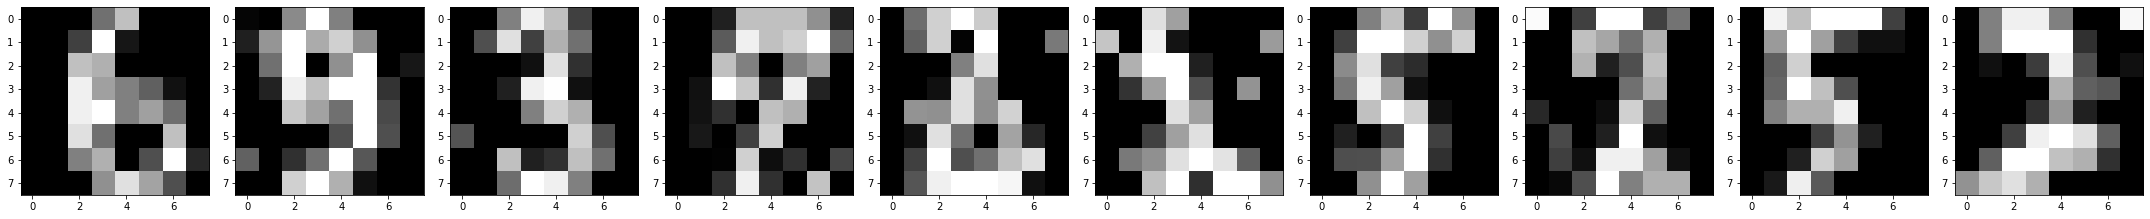

In [ ]:
#Dataset corrupto
X_test_10_copia = X_test_10.copy()
X_test_10 = X_test_10.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test_10[:num][i], cmap='gray')
plt.tight_layout()
plt.show()
X_test_10 = X_test_10_copia.copy()

Comparandolo la misma codificación de los 10 ejemplos que llevamos viendo, podemos ver que algunos valores de píxeles si que se han corrompido. Claramente en los últimos dígitos se puede apreciar esta situación.

#### **Codificación del conjunto de datos un 30% de valores corruptos**

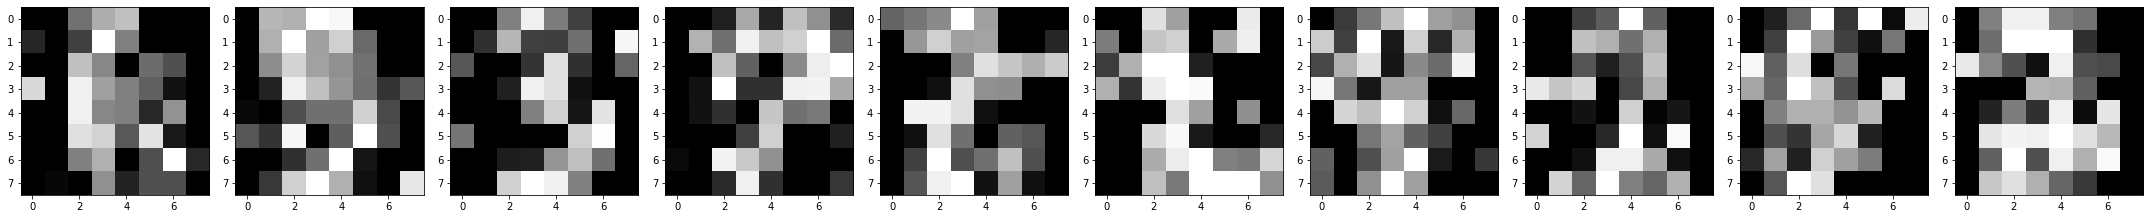

In [ ]:
#Dataset corrupto
X_test_30_copia = X_test_30.copy()
X_test_30 = X_test_30.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test_30[:num][i], cmap='gray')
plt.tight_layout()
plt.show()
X_test_30 = X_test_30_copia.copy()

De forma más notable aún, corrompiendo un 30% de los valores de los píxeles se ve de forma clara. En la mayoria de imágenes píxeles que eran o bien blancos o bien negros, se ve que claramente han adoptado otro valor completamente distinto.

### c.1) Entrenad el auto-codificador y calculad el error cuadrático de la salida con respecto a los datos originales para el entrenamiento y el test. ¿Es el error ahora mejor o peor? ¿Por qué?

#### **Entrenando autoencoder con el conjunto de datos con un 10% de valores corruptos**

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 3744
BATCH_SIZE = 100
act = 'sigmoid' 

entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(32, activation=act)(entrada)
codificar = keras.layers.Dense(2, activation=act)(codificar)
decodificar = keras.layers.Dense(32, activation=act)(codificar)
decodificar = keras.layers.Dense(64, activation=act)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador_sigmoid = keras.Model(entrada, codificar)

autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
history = autocodificador.fit(X_train_10, X_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)

#.predict
X_train_pred = autocodificador.predict(X_train_10)
X_test_pred = autocodificador.predict(X_test_10)

#calcular el MSE després d'entrenar les xarxes per les dades d'entrament i test com la 
#mitja de les diferències quadràtiques entres les dades i les prediccions
train_er = mean_squared_error(X_train, X_train_pred)
test_er = mean_squared_error(X_test, X_test_pred)

#MSE i número de capas
print("Nb layers:", 32)
print("train_error:", train_er)
print("test_error:", test_er)

#training data
print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
print("best train_loss loss result:", min(history.history['loss']))

#cross-validation data
print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
print("best val_loss loss result:", min(history.history['val_loss']))

17/17 [==============================] - 0s 1ms/step
Nb layers: 32
train_error: 0.040082639659629
test_error: 0.05176775978895893
best train_loss epoch result: 3741
best train_loss loss result: 0.03455645218491554
best val_loss epoch result: 1502
best val_loss loss result: 0.04721885919570923


Si recuperamos la tabla de resultados:

| Función de Activación | Hidden Layers | loss | loss epochs | val_loss |val_loss epochs | train_error | test_error| 
|---|---	|---	|---	|---	|---	| ----| ----|
|Linear|64	|0.053841978311538696	|1741	|0.053393296897411346	|413	| 0.053722491745080876| 0.053818799884698676|
|Sigmoid|32	|0.02890222892165184	|5998	|0.0394270196557045	|3744	| 0.03225414663614189| 0.03905645425745416|
|ReLU|64|0.0428948812186718	| 2978 | 0.056848540902137756|1990	|0.04732350998969359| 0.05700943991739691|

Podemos ver como ahora el error cuadrático de la salida con respecto a los datos originales para el entrenamiento y el test que tenemos es peor al que teníamos.

Teniendo ahora unos valores de:

|Función Activación| Corrupto?| train_error | test_error|
|--|--|--|--|
|Sigmoidea|No|0.03225414663614189| 0.03905645425745416|
|Sigmoidea|Si 10%|0.040082639659629| 0.05176775978895893|

Esto es así ya que aunque estemos usando el mismo codificador tenemos datos corrompidos. Y por lo tanto es de esperar que ambos errores sean superiores y con un mayor sobreajuste. Así que es totalmente comprensible lo que está ocurriendo.

#### **Comparación de la codificación para 10 ejemplos de los datos usando el mejor codificador sigmoid con un 10% de datos corruptos comparado con los 10 ejemplos de datos originales**

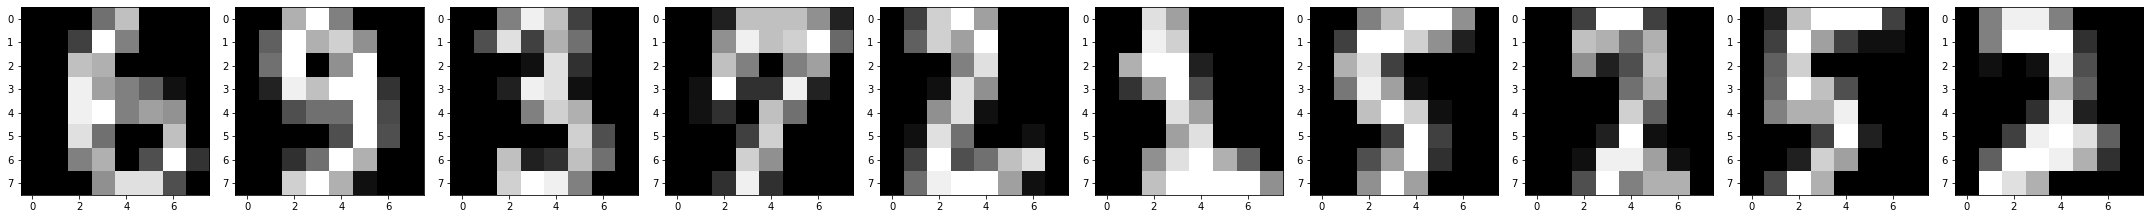

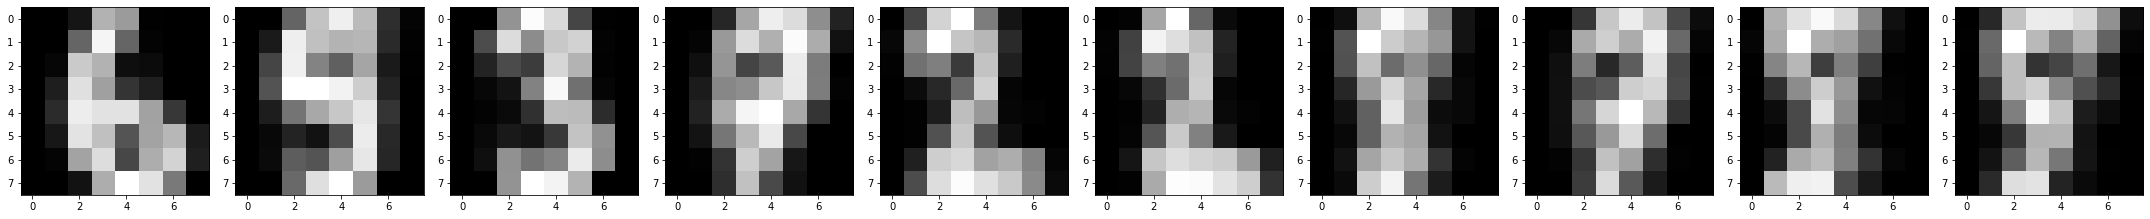

In [ ]:
#10% corrupto
X_test_copia = X_test.copy()
X_test = X_test.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test[:num][i], cmap='gray')
plt.tight_layout()
plt.show()

#Predichos por la red
X_test_pred = X_test_pred.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test_pred[:num][i], cmap='gray')
plt.tight_layout()
plt.show()
X_test = X_test_copia.copy()

#### **Entrenando autoencoder con el conjunto de datos con un 30% de valores corruptos**

In [ ]:
#falta normalitzar les dades que sinó el loss sortia escalat
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 3744
BATCH_SIZE = 100
act = 'sigmoid' 

entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(32, activation=act)(entrada)
codificar = keras.layers.Dense(2, activation=act)(codificar)
decodificar = keras.layers.Dense(32, activation=act)(codificar)
decodificar = keras.layers.Dense(64, activation=act)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador_sigmoid = keras.Model(entrada, codificar)

autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
history = autocodificador.fit(X_train_30, X_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)

#.predict
X_train_pred = autocodificador.predict(X_train_30)
X_test_pred = autocodificador.predict(X_test_30)

#calcular el MSE després d'entrenar les xarxes per les dades d'entrament i test com la 
#mitja de les diferències quadràtiques entres les dades i les prediccions
train_er = mean_squared_error(X_train, X_train_pred)
test_er = mean_squared_error(X_test, X_test_pred)

#MSE i número de capas
print("Nb layers:", 32)
print("train_error:", train_er)
print("test_error:", test_er)

#training data
print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
print("best train_loss loss result:", min(history.history['loss']))

#cross-validation data
print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
print("best val_loss loss result:", min(history.history['val_loss']))

17/17 [==============================] - 0s 1ms/step
Nb layers: 32
train_error: 0.04453390265784582
test_error: 0.06520626258387142
best train_loss epoch result: 3742
best train_loss loss result: 0.03434732183814049
best val_loss epoch result: 1543
best val_loss loss result: 0.055040743201971054


Si recuperamos la tabla de resultados:

| Función de Activación | Hidden Layers | loss | loss epochs | val_loss |val_loss epochs | train_error | test_error| 
|---|---	|---	|---	|---	|---	| ----| ----|
|Linear|64	|0.053841978311538696	|1741	|0.053393296897411346	|413	| 0.053722491745080876| 0.053818799884698676|
|Sigmoid|32	|0.02890222892165184	|5998	|0.0394270196557045	|3744	| 0.03225414663614189| 0.03905645425745416|
|ReLU|64|0.0428948812186718	| 2978 | 0.056848540902137756|1990	|0.04732350998969359| 0.05700943991739691|

También, podemos ver como ahora el error cuadrático de la salida con respecto a los datos originales para el entrenamiento y el test que tenemos es peor al que teníamos.

Teniendo ahora unos valores de:

|Función Activación| Corrupto?| train_error | test_error|
|--|--|--|--|
|Sigmoidea|No|0.03225414663614189| 0.03905645425745416|
|Sigmoidea|Si 10%|0.040082639659629| 0.05176775978895893|
|Sigmoidea|Si 30%|0.04453390265784582| 0.06520626258387142|

Esto es así ya que aunque estemos usando el mismo codificador tenemos datos corrompidos. Y por lo tanto es de esperar que ambos errores sean superiores y con un mayor sobreajuste que sigue manteniéndose al que teníamos con el conjunto del 10% de valores corruptos. Así que es totalmente comprensible lo que está ocurriendo. 

#### **Comparación de la codificación para 10 ejemplos de los datos usando el mejor codificador sigmoid con un 30% de datos corruptos comparado con los 10 ejemplos de datos originales**

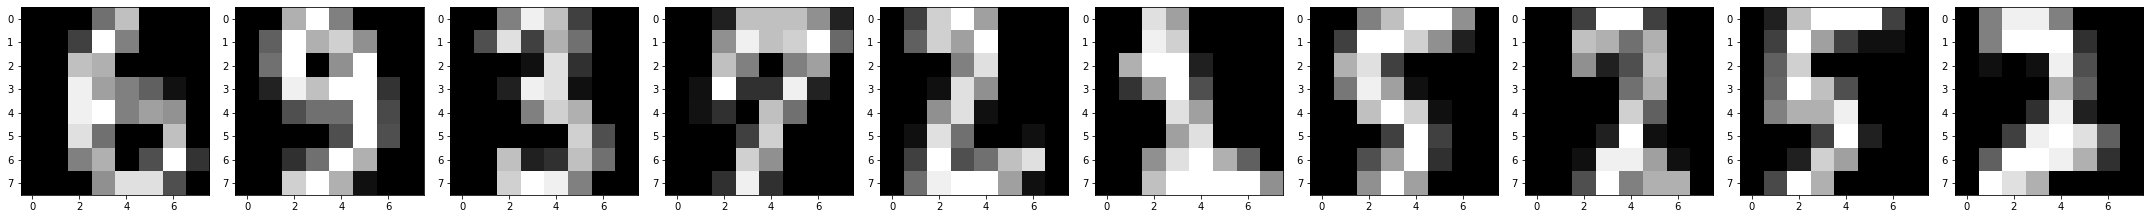

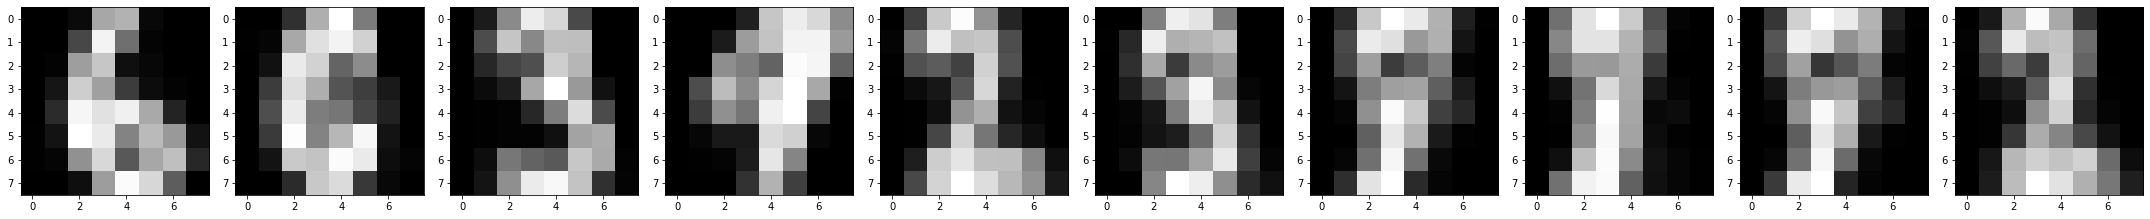

In [ ]:
#30% corrupto
X_test_copia = X_test.copy()
X_test = X_test.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test[:num][i], cmap='gray')
plt.tight_layout()
plt.show()

#Predichos por la red
X_test_pred = X_test_pred.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test_pred[:num][i], cmap='gray')
plt.tight_layout()
plt.show()
X_test = X_test_copia.copy()

### c.2) Concatenad dos copias de los datos de entrenamiento (duplicad los datos) y cread dos conjuntos de datos con 10 % y 30 % de corrupción respectivamente. Entrenad el auto-codificador con estos datos. ¿Es el error ahora mejor?

#### **Generación del doble conjunto de datos corruptos, con un 10% y un 30% de valores corruptos**

In [ ]:
import copy

X = digits_data.data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

X_2 = [val for i in range(2) for index, val in enumerate(X)]
y_2 = [y[index] for i in range(2) for index, val in enumerate(X)]

X_2_10 = [copy.deepcopy(val) for i in range(2) for index, val in enumerate(X)]
X_2_30 = [copy.deepcopy(val) for i in range(2) for index, val in enumerate(X)]

X_10_pixels = [random.sample(range(0, 64), round(0.1*64)) for i in range(2*len(X))]
X_2_10 = [    [np.random.uniform(low=0, high=1) if i in pixels else pixel for i, pixel in enumerate(val)]
    for val, pixels in zip(X_2_10, X_10_pixels)
]

X_30_pixels = [random.sample(range(0, 64), round(0.3*64)) for i in range(2*len(X))]
X_2_30 = [    [np.random.uniform(low=0, high=1) if i in pixels else pixel for i, pixel in enumerate(val)]
    for val, pixels in zip(X_2_30, X_30_pixels)
]

X_2 = np.array(X_2)
y_2 = np.array(y_2)
X_2_10 = np.array(X_2_10)
X_2_30 = np.array(X_2_30)

y_2_train, y_2_test = train_test_split(y_2, test_size=0.3, random_state=42)
X_2_train, X_2_test = train_test_split(X_2, test_size=0.3, random_state=42)
X_2_10_train, X_2_10_test = train_test_split(X_2_10, test_size=0.3, random_state=42)
X_2_30_train, X_2_30_test = train_test_split(X_2_30, test_size=0.3, random_state=42)

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]


In [ ]:
X_2_10_train, X_2_10_test

(array([[0.        , 0.        , 0.125     , ..., 0.        , 0.        ,
         0.        ],
        [0.70939322, 0.        , 0.        , ..., 0.75      , 0.0625    ,
         0.        ],
        [0.        , 0.        , 0.89695986, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.5625    , ..., 1.        , 0.125     ,
         0.        ],
        [0.95211713, 0.        , 0.04036184, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.125     , ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.        , 0.        , 0.4375    , ..., 0.68885786, 0.        ,
         0.        ],
        [0.        , 0.33318126, 0.6875    , ..., 0.6875    , 0.1875    ,
         0.        ],
        [0.        , 0.        , 0.94329345, ..., 0.0625    , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.3125    , ..., 0.25      , 0.        ,
         0.        ],
        [0. 

In [ ]:
X_2_30_train, X_2_30_test

(array([[0.        , 0.        , 0.09806257, ..., 0.        , 0.        ,
         0.        ],
        [0.64884973, 0.        , 0.        , ..., 0.75      , 0.0625    ,
         0.        ],
        [0.        , 0.0372274 , 0.125     , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.5625    , ..., 1.        , 0.125     ,
         0.        ],
        [0.32697817, 0.        , 0.1875    , ..., 0.        , 0.        ,
         0.11113325],
        [0.72005899, 0.33890321, 0.125     , ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.27022975, 0.48904086, 0.77162504, ..., 0.23306364, 0.57764936,
         0.        ],
        [0.        , 0.25      , 0.6875    , ..., 0.6875    , 0.1875    ,
         0.84311575],
        [0.80932982, 0.        , 0.47339683, ..., 0.0625    , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.3125    , ..., 0.25      , 0.        ,
         0.41489904],
        [0.8

##### Transformación de los datos

In [ ]:
scaler = MinMaxScaler()
X_2_10_train = scaler.fit_transform(X_2_10_train)
X_2_10_test = scaler.transform(X_2_10_test)

scaler = MinMaxScaler()
X_2_30_train = scaler.fit_transform(X_2_30_train)
X_2_30_test = scaler.transform(X_2_30_test)

#### **Codificación del doble conjunto de datos un 10% de valores corruptos**

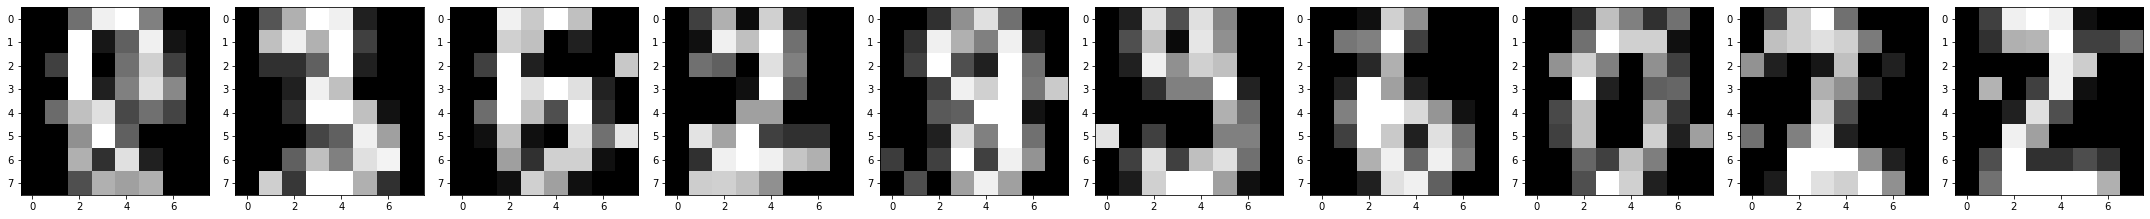

In [ ]:
#Doble Dataset corrupto 10%
X_2_10_test_copia = X_2_10_test.copy()
X_2_10_test = X_2_10_test.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_2_10_test[:num][i], cmap='gray')
plt.tight_layout()
plt.show()
X_2_10_test = X_2_10_test_copia.copy()

Ahora tenemos una nueva codificación de 10 ejemplos de los que llevabamos viendo, pero si que podemos ver que algunos valores de píxeles si que se han corrompido y además ahora tenemos un conjunto de datos que es el doble de grande. Ahora ya podemos ver un ejemplo del 0.

Claramente en los últimos dígitos se puede apreciar esta situación. Además, vemos que ahora aunque confunda algunos dígitos, parece que algunos dígitos se ven realmente bien.

#### **Codificación del doble conjunto de datos un 30% de valores corruptos**

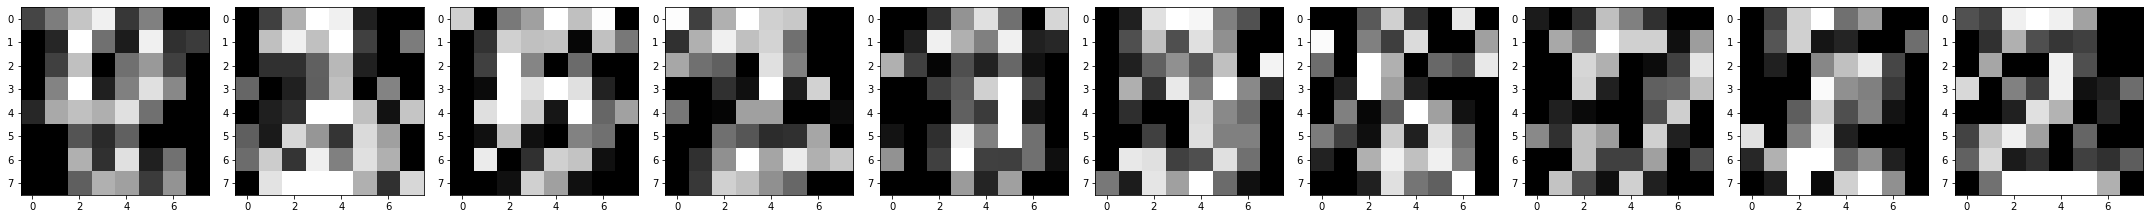

In [ ]:
#Doble Dataset corrupto 30%
X_2_30_test_copia = X_2_30_test.copy()
X_2_30_test = X_2_30_test.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_2_30_test[:num][i], cmap='gray')
plt.tight_layout()
plt.show()
X_2_30_test = X_2_30_test_copia.copy()

Ahora tenemos una nueva codificación de 10 ejemplos de los que llevabamos viendo, pero si que podemos ver que algunos valores de píxeles si que se han corrompido mucho y además ahora tenemos un conjunto de datos que es el doble de grande. Ahora no podemos apreciar de forma clara el 0, ni el 6 que teníamos.

Claramente en todos los dígitos se puede apreciar esta situación. Todos los dígitos parecen realmente impopsibles de decir cúales son.

In [ ]:
print(X_2_10_train.shape, X_train.shape, y_2_train.shape)

(2515, 64) (1257, 64) (2515,)


#### **Entrenando autoencoder con el doble conjunto de datos con un 10% de valores corruptos**

In [ ]:
#falta normalitzar les dades que sinó el loss sortia escalat
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 3744
BATCH_SIZE = 100
act = 'sigmoid' 

entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(32, activation=act)(entrada)
codificar = keras.layers.Dense(2, activation=act)(codificar)
decodificar = keras.layers.Dense(32, activation=act)(codificar)
decodificar = keras.layers.Dense(64, activation=act)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador_sigmoid_10 = keras.Model(entrada, codificar)

autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
history = autocodificador.fit(X_2_10_train, X_2_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)

#.predict
X_train_pred = autocodificador.predict(X_2_10_train)
X_test_pred = autocodificador.predict(X_2_10_test)

#calcular el MSE després d'entrenar les xarxes per les dades d'entrament i test com la 
#mitja de les diferències quadràtiques entres les dades i les prediccions
train_er = mean_squared_error(X_2_train, X_train_pred)
test_er = mean_squared_error(X_2_test, X_test_pred)

#MSE i número de capas
print("Nb layers:", 32)
print("train_error:", train_er)
print("test_error:", test_er)

#training data
print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
print("best train_loss loss result:", min(history.history['loss']))

#cross-validation data
print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
print("best val_loss loss result:", min(history.history['val_loss']))

34/34 [==============================] - 0s 1ms/step
Nb layers: 32
train_error: 0.034605004824540764
test_error: 0.045585992126384
best train_loss epoch result: 3741
best train_loss loss result: 0.02993435598909855
best val_loss epoch result: 1587
best val_loss loss result: 0.041887931525707245


Si recuperamos la tabla de resultados:

| Función de Activación | Hidden Layers | loss | loss epochs | val_loss |val_loss epochs | train_error | test_error| 
|---|---	|---	|---	|---	|---	| ----| ----|
|Linear|64	|0.053841978311538696	|1741	|0.053393296897411346	|413	| 0.053722491745080876| 0.053818799884698676|
|Sigmoid|32	|0.02890222892165184	|5998	|0.0394270196557045	|3744	| 0.03225414663614189| 0.03905645425745416|
|ReLU|64|0.0428948812186718	| 2978 | 0.056848540902137756|1990	|0.04732350998969359| 0.05700943991739691|

Podemos ver como ahora el error cuadrático de la salida con respecto a los datos originales para el entrenamiento y el test que tenemos es ligeramente peor al que teníamos con el mejor modelo y mucho mejor que el error que teniamos para el conjunto de datos sin doblar con un 10% de valores corruptos.

Teniendo ahora unos valores de:

|Función Activación| Corrupto?| Doble conjunto |train_error | test_error|
|--|--|--|--|--|
|Sigmoidea|No|No|0.03225414663614189| 0.03905645425745416|
|Sigmoidea|Si 10%|No|0.040082639659629| 0.05176775978895893|
|Sigmoidea|Si 10%|Si|0.034605004824540764|0.045585992126384|

Esto es así ya que aunque estemos usando el mismo codificador tenemos datos corrompidos. Y por lo tanto es de esperar que ambos errores sean superiores y con un mayor sobreajuste. Aún así, lo que vemos es que tenemos un modelo mucho mejor al que teníamos sin doblar el conjunto de datos corruptos. No es ninguna sorpresa que esto sea así, puesto que hemos doblado el conjunto de datos. 

#### **Comparación de la codificación para 10 ejemplos de los datos usando el mejor codificador sigmoid con un 10% del doble conjunto de datos corruptos comparado con los 10 ejemplos de datos originales**

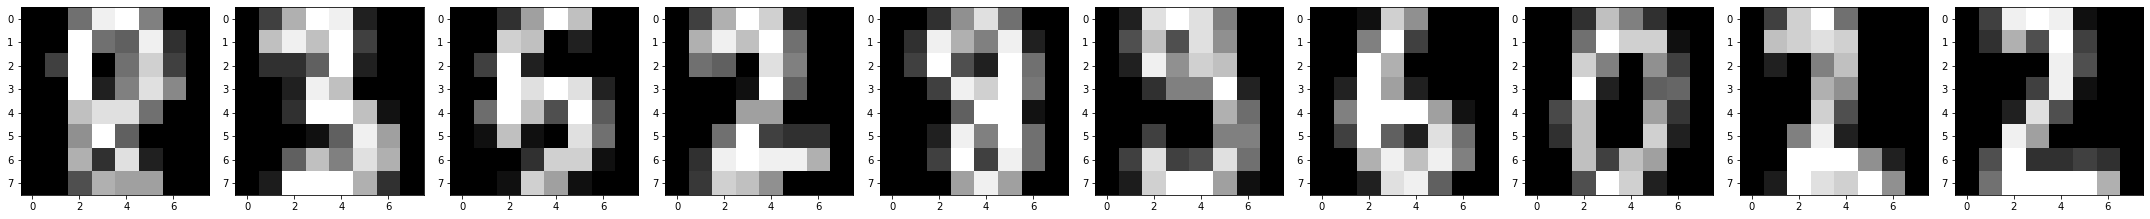

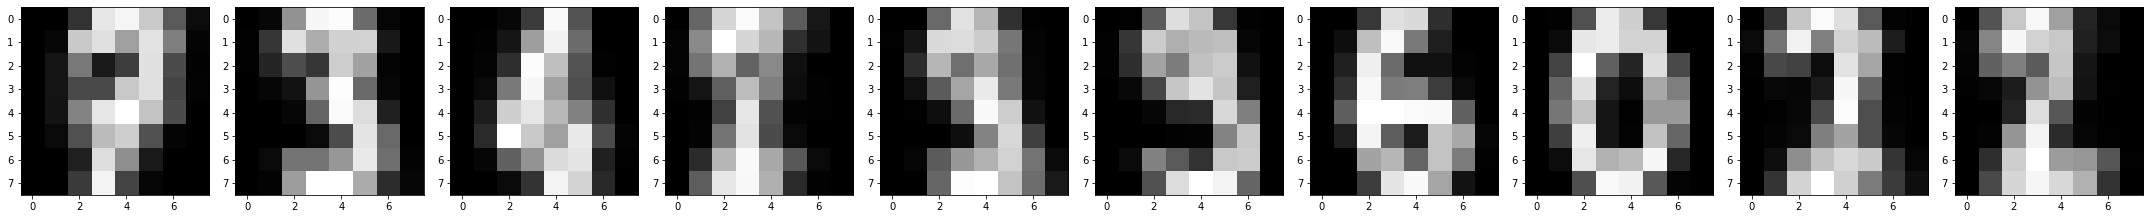

In [ ]:
#Doble 10% corrupto
X_2_test_copia = X_2_test.copy()
X_2_test = X_2_test.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_2_test[:num][i], cmap='gray')
plt.tight_layout()
plt.show()

#Predichos por la red
X_test_pred = X_test_pred.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test_pred[:num][i], cmap='gray')
plt.tight_layout()
plt.show()
X_2_test = X_2_test_copia.copy()

Obtenemos una muy buena codificación de algunos dígitos, como es el caso del 6, del 0, del 3 o del 2. Podremos ver claramente porqué esto es así en la repsentación del PCA.

#### **Entrenando autoencoder con el doble conjunto de datos con un 30% de valores corruptos**

In [ ]:
#falta normalitzar les dades que sinó el loss sortia escalat
scaler = MinMaxScaler()
X_2_train = scaler.fit_transform(X_2_train)
X_2_test = scaler.transform(X_2_test)

EPOCHS = 3744
BATCH_SIZE = 100
act = 'sigmoid' 

entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(32, activation=act)(entrada)
codificar = keras.layers.Dense(2, activation=act)(codificar)
decodificar = keras.layers.Dense(32, activation=act)(codificar)
decodificar = keras.layers.Dense(64, activation=act)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador_sigmoid_30 = keras.Model(entrada, codificar)

autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
history = autocodificador.fit(X_2_30_train, X_2_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)

#.predict
X_train_pred = autocodificador.predict(X_2_30_train)
X_test_pred = autocodificador.predict(X_2_30_test)

#calcular el MSE després d'entrenar les xarxes per les dades d'entrament i test com la 
#mitja de les diferències quadràtiques entres les dades i les prediccions
train_er = mean_squared_error(X_2_train, X_train_pred)
test_er = mean_squared_error(X_2_test, X_test_pred)

#MSE i número de capas
print("Nb layers:", 32)
print("train_error:", train_er)
print("test_error:", test_er)

#training data
print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
print("best train_loss loss result:", min(history.history['loss']))

#cross-validation data
print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
print("best val_loss loss result:", min(history.history['val_loss']))

34/34 [==============================] - 0s 2ms/step
Nb layers: 32
train_error: 0.03979936598615123
test_error: 0.05960708497070477
best train_loss epoch result: 3740
best train_loss loss result: 0.031380701810121536
best val_loss epoch result: 903
best val_loss loss result: 0.04793957248330116


Si recuperamos la tabla de resultados:

| Función de Activación | Hidden Layers | loss | loss epochs | val_loss |val_loss epochs | train_error | test_error| 
|---|---	|---	|---	|---	|---	| ----| ----|
|Linear|64	|0.053841978311538696	|1741	|0.053393296897411346	|413	| 0.053722491745080876| 0.053818799884698676|
|Sigmoid|32	|0.02890222892165184	|5998	|0.0394270196557045	|3744	| 0.03225414663614189| 0.03905645425745416|
|ReLU|64|0.0428948812186718	| 2978 | 0.056848540902137756|1990	|0.04732350998969359| 0.05700943991739691|

Podemos ver como ahora el error cuadrático de la salida con respecto a los datos originales para el entrenamiento y el test que tenemos es bastante peor al que teníamos con el mejor modelo como así, pero al modelo con solo un 10% de valores corruptos para el doble conjunto de datos. Aún así, este como ya sucedia en el anterior,es mucho mejor que el error que teniamos para el conjunto de datos sin doblar con un 30% de valores corruptos.

Teniendo ahora unos valores de:

|Función Activación| Corrupto?| Doble conjunto |train_error | test_error|
|--|--|--|--|--|
|Sigmoidea|No|No|0.03225414663614189| 0.03905645425745416|
|Sigmoidea|Si 10%|No|0.040082639659629| 0.05176775978895893|
|Sigmoidea|Si 30%|No|0.04453390265784582| 0.06520626258387142|
|Sigmoidea|Si 10%|Si|0.034605004824540764|0.045585992126384|
|Sigmoidea|Si 30%|Si|0.03979936598615123|0.05960708497070477|

Nuestros modelos corruptos siguen sobreajustando todos y se ve de forma clara en el último registro de la tabla que tenemos arriba. Sobretodo para el doble conjunto con un 30% de datos corruptos se ve de forma clara. 

#### **Comparación de la codificación para 10 ejemplos de los datos usando el mejor codificador sigmoid con un 30% del doble conjunto de datos corruptos comparado con los 10 ejemplos de datos originales**

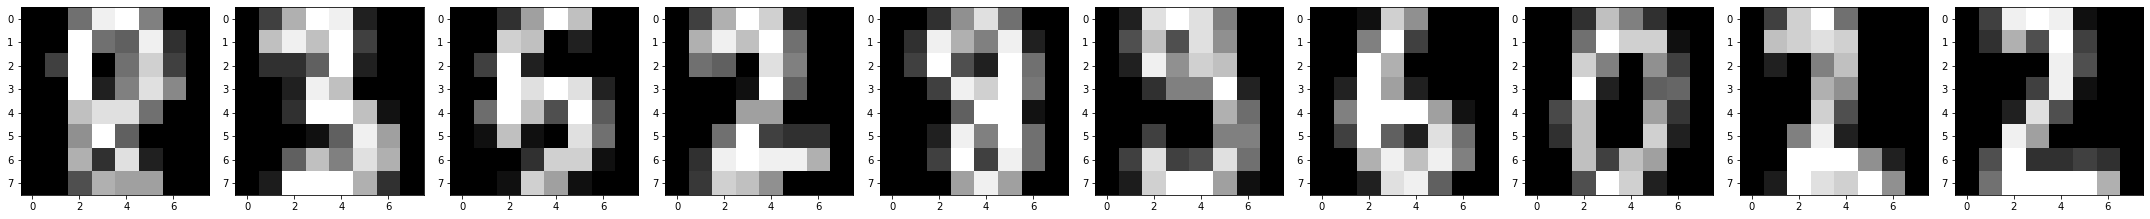

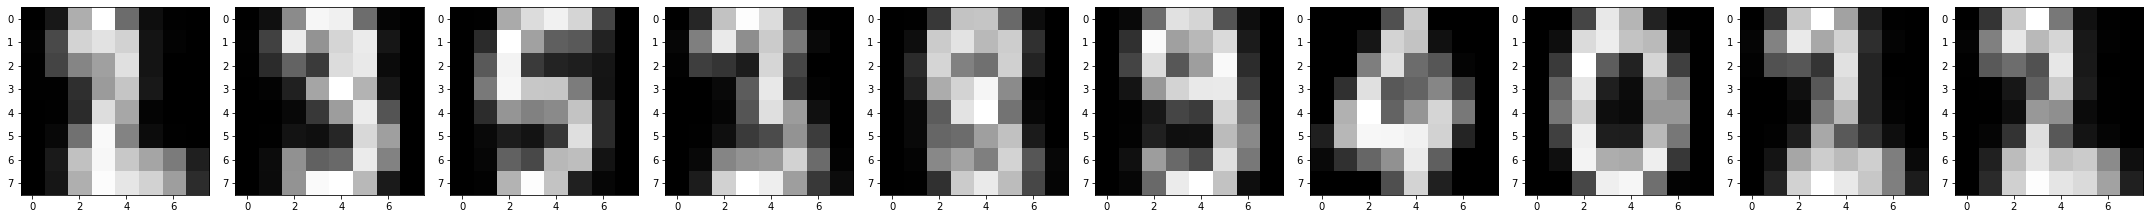

In [ ]:
#Doble 30% corrupto
X_2_test_copia = X_2_test.copy()
X_2_test = X_2_test.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_2_test[:num][i], cmap='gray')
plt.tight_layout()
plt.show()

#Predichos por la red
X_test_pred = X_test_pred.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test_pred[:num][i], cmap='gray')
plt.tight_layout()
plt.show()
X_2_test = X_2_test_copia.copy()

En esta codificación obtenemos una peor codificación de algunos dígitos, como es el caso del 6 ya que parece que lo atribuye a un 4. Pero parece que para el 3 hace un buen trabajo. Además para el tercer dígito, aunque parezca un 6 lo clasifica como un 5. Podemos ver que en general se confuda en la clasificación de los dígitos. Pero para algunos como es el 0, o el 1 parece que si lo tiene claro.

### c.3) Utilizad el codificador entrenado con los conjuntos de datos de entrenamiento corrupto doblado que tiene el mejor error cuadrático y transformad los datos de entrenamiento originales. Comparad la representación 2D con la del codificador original (el que no tiene ruido). ¿Son los datos más separables ahora?

#### **PCA sigmoid doble corrupto 10%**

40/40 [==============================] - 0s 1ms/step


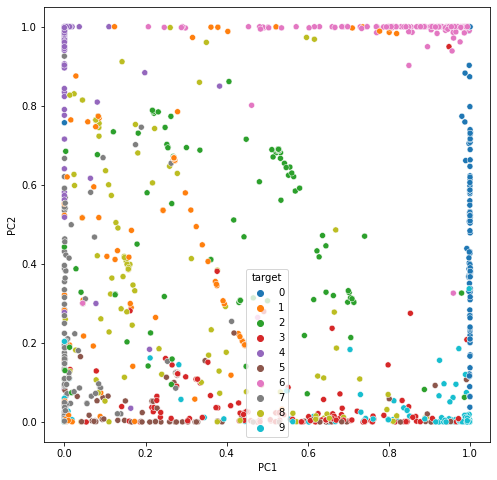

In [ ]:
scaler = MinMaxScaler()
X_train_standarized = X_train.copy()
X_train_standarized[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

data_sigmoid = codificador_sigmoid_10.predict(X_train)

X_train_standarized[['PC1','PC2']] = data_sigmoid[:,:2]

fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=X_train_standarized, hue=y_train, palette='tab10')

Tal y como podemos apreciar en esta repsentación del PCA obtenida con el codificador calculado con la mejor red para la función sigmoid con el doble conjunto de datos corruptos al 10%, podemos ver que se obtiene una separabilidad un poco mala para todas las clases excepto para claramente la del dígito 0 y 6 como ya hemos visto en la codificación de los ejemplos. 

La distribución de este PCA no se parece en nada con respecto al PCA original de la función sigmoid [PCA originial Sigmoid](#PCA-sigmoid) y es claramente peor. También com ya ocurria en la parte inferior y en la izquierda de la imagen si que se puede ver que tiene mucha confusión con ciertos dígitos, ya que hay un popuurri de dígitos distintos. Vemos que el PCA intenta poner los clústeres en los bordes, pero no consigue logarlo muy exitosamente.

Además otra vez, esta forma de esta representación también viene justificada por la concepción del espacio y proyección que hace el autoencoder sigmoideo. Por ahora con la intención de poner todos los clústeres a los lados.

Por lo tanto, vemos que este codificador sigmoideo es bueno pero sin nada que envidiar en comparación al original. Este tiene una peor separabilidad para todas las clases. Como hemos visto si que algunos dígitos se ven de forma nítida y forzando e imaginando un poco podemos distingir algunos otros. 

Esto es así ya que aunque para algunas clases funcione bien, tenemos que este autoencoder, sirve para transformar datos corruptos en datos correctos, por lo que puede tener dificultades para hacerlo correctament y además pasandole los datos originales, puede tener dificultades distingiendo porque puede suponer que los valores originales simplemente son ruido y que los datos están corruptos.

#### **PCA sigmoid doble corrupto 30%**

40/40 [==============================] - 0s 1ms/step


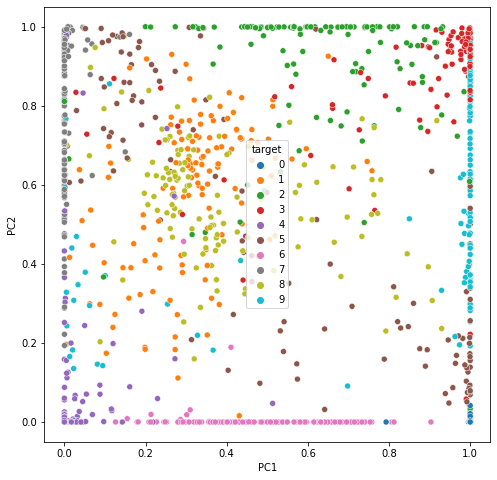

In [ ]:
data_sigmoid = codificador_sigmoid_30.predict(X_train)

X_train_standarized[['PC1','PC2']] = data_sigmoid[:,:2]

fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=X_train_standarized, hue=y_train, palette='tab10')

Tal y como podemos apreciar en esta repsentación del PCA obtenida con el codificador calculado con la mejor red para la función sigmoid con el doble conjunto de datos corruptos al 30%, podemos ver que se obtiene una separabilidad un poco mala para algunas clases auqnque para nada del todo mala, como podemos ver claramente para: la del dígito 0,2,3,6,5 como ya hemos visto en la codificación de los ejemplos. 

La distribución de este PCA se parece un poco con respecto al PCA original de la función sigmoid [PCA originial Sigmoid](#PCA-sigmoid) ya que no todo está en los bordes y tenemos clústeres en el medio que se pueden distingir un poco.  Ahora ya no ocurre que en la parte inferior y e izquierda de la imagen hay confusión con ciertos dígitos, sin tener el popuurri de dígitos distintos.

Vemos que el PCA intenta poner los clústeres en los bordes, y consigue logarlo muy exitosamente para el 0 y para varios más.

Además otra vez, esta forma de esta representación también viene justificada por la concepción del espacio y proyección que hace el autoencoder sigmoideo. Por ahora con la intención de poner todos los clústeres a los lados y con algunos en el medio.

Por lo tanto, vemos que este codificador sigmoideo es bueno y realmente funciona bien para muchos digitos, pero puuede llegar a confundir digitos y pintarlos como otros y que este seguro de su decision. 